In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import os
import seaborn as sns
import networkx as nx
from scipy import stats
import matplotlib.colors as mcolors

# Eurovision Song Contest (ESC) Analysis

## Data Familiarization

In [58]:
# Get current directory
cwd = os.getcwd()
print(cwd)

c:\Users\mate1\OneDrive\Escritorio\Repository\Eurovision_Contest_Analysis


In [59]:
# Load data
df_votes = pd.read_csv('Data/votes.csv')
df_votes.head()

,year,round,from_country_id,to_country_id,from_country,to_country,total_points,tele_points,jury_points
0,1957,final,at,nl,at,nl,6,NaN,NaN
1,1957,final,at,fr,at,fr,0,NaN,NaN
2,1957,final,at,dk,at,dk,0,NaN,NaN
3,1957,final,at,lu,at,lu,3,NaN,NaN
4,1957,final,at,de,at,de,0,NaN,NaN


In [60]:
# Get the initial and last years of the data
initial_year = df_votes['year'].min()
final_year = df_votes['year'].max()
print('Initial year:', initial_year)
print('Final year:', final_year)

Initial year: 1957
Final year: 2023


### Data Cleaning

In this work we are only interested in the final round.

In [61]:
# Get only the final round
df_final_round = df_votes[df_votes['round'] == 'final']

In [62]:
# # Remove giving 0 points
# df_final_round = df_final_round[df_final_round['total_points'] > 0]
# df_final_round

In [63]:
# Get the total number of countries
total_countries = df_final_round['from_country_id']
total_countries = np.array(total_countries)
total_countries = np.unique(total_countries)
print('Total countries:', total_countries)
print('Number of countries:', len(total_countries))

Total countries: ['ad' 'al' 'am' 'at' 'au' 'az' 'ba' 'be' 'bg' 'by' 'ch' 'cs' 'cy' 'cz'
 'de' 'dk' 'ee' 'es' 'fi' 'fr' 'gb' 'ge' 'gr' 'hr' 'hu' 'ie' 'il' 'is'
 'it' 'lt' 'lu' 'lv' 'ma' 'mc' 'md' 'me' 'mk' 'mt' 'nl' 'no' 'pl' 'pt'
 'ro' 'rs' 'ru' 'se' 'si' 'sk' 'sm' 'tr' 'ua' 'wld' 'yu']
Number of countries: 53


In [64]:
# # Broadcast the Yugoslavia points to their actual countries
# broadcast = {
#     'yu': ['ba', 'hr', 'mk', 'rs', 'si'],
#     'cs': ['rs', 'me']
# }

# df_final_round['from_country_id'] = df_final_round['from_country_id'].apply(lambda x: broadcast[x] if x in broadcast.keys() else x)
# df_final_round['to_country_id'] = df_final_round['to_country_id'].apply(lambda x: broadcast[x] if x in broadcast.keys() else x)
# df_final_round.explode('from_country_id').explode('to_country_id')

In [65]:
# Dictionary with the real name of the countries
country_id_to_name = {
    'ad': 'Andorra',
    'al': 'Albania',
    'am': 'Armenia',
    'at': 'Austria',
    'au': 'Australia',
    'az': 'Azerbaijan',
    'ba': 'Bosnia',
    'be': 'Belgium',
    'bg': 'Bulgaria',
    'by': 'Belarus',
    'ch': 'Switzerland',
    'cs': 'Serbia and Montenegro',  # Historical ID
    'cy': 'Cyprus',
    'cz': 'Czech Republic',
    'de': 'Germany',
    'dk': 'Denmark',
    'ee': 'Estonia',
    'es': 'Spain',
    'fi': 'Finland',
    'fr': 'France',
    'gb': 'UK',
    'ge': 'Georgia',
    'gr': 'Greece',
    'hr': 'Croatia',
    'hu': 'Hungary',
    'ie': 'Ireland',
    'il': 'Israel',
    'is': 'Iceland',
    'it': 'Italy',
    'lt': 'Lithuania',
    'lu': 'Luxembourg',
    'lv': 'Latvia',
    'ma': 'Morocco',
    'mc': 'Monaco',
    'md': 'Moldova',
    'me': 'Montenegro',
    'mk': 'N. Macedonia',
    'mt': 'Malta',
    'nl': 'Netherlands',
    'no': 'Norway',
    'pl': 'Poland',
    'pt': 'Portugal',
    'ro': 'Romania',
    'rs': 'Serbia',
    'ru': 'Russia',
    'se': 'Sweden',
    'si': 'Slovenia',
    'sk': 'Slovakia',
    'sm': 'San Marino',
    'tr': 'Turkey',
    'ua': 'Ukraine',
    'wld': 'World',  # Possible placeholder for aggregated data
    'yu': 'Yugoslavia'  # Historical ID
}

In [66]:
df_final_round['from_country'] = df_final_round['from_country'].map(country_id_to_name)
df_final_round['to_country'] = df_final_round['to_country'].map(country_id_to_name)
df_final_round

C:\Users\mate1\AppData\Local\Temp\ipykernel_4180\1287897805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_round['from_country'] = df_final_round['from_country'].map(country_id_to_name)
C:\Users\mate1\AppData\Local\Temp\ipykernel_4180\1287897805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_round['to_country'] = df_final_round['to_country'].map(country_id_to_name)


,year,round,from_country_id,to_country_id,from_country,to_country,total_points,tele_points,jury_points
0,1957,final,at,nl,Austria,Netherlands,6,NaN,NaN
1,1957,final,at,fr,Austria,France,0,NaN,NaN
2,1957,final,at,dk,Austria,Denmark,0,NaN,NaN
3,1957,final,at,lu,Austria,Luxembourg,3,NaN,NaN
4,1957,final,at,de,Austria,Germany,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
51349,2023,final,wld,al,World,Albania,6,6.0,NaN
51350,2023,final,wld,pt,World,Portugal,0,0.0,NaN
51351,2023,final,wld,rs,World,Serbia,0,0.0,NaN
51352,2023,final,wld,gb,World,UK,0,0.0,NaN


### Number of Participations

In [67]:
def participation_counts_f(df, initial_year, final_year):
    
    # Get the number of participations of each country
    df = df[(df['year'] >= initial_year) & (df['year'] <= final_year)]

    # Combine all country IDs into a single column with the corresponding year
    participations = pd.concat([
        df[['year', 'from_country']].rename(columns={'from_country': 'country'}),
        df[['year', 'to_country']].rename(columns={'to_country': 'country'}),
    ])

    # Explode the lists into individual rows
    participations = participations.explode('country')

    # Drop duplicates to ensure each country-year combination is only counted once
    participations = participations.drop_duplicates()

    # Count the number of unique years each country participated
    participation_counts = participations.groupby('country')['year'].nunique()

    # Convert the result to a DataFrame
    participation_counts = participation_counts.reset_index()
    participation_counts.columns = ['country', 'participation_count']
    
    return participation_counts

In [68]:
# Get the number of participations of each country

participation_counts = participation_counts_f(df_final_round, initial_year, final_year)

# Represent in a table the number of participations of each country with their complete name
participation_counts = participation_counts.sort_values('participation_count', ascending=False)
participation_counts[['country', 'participation_count']]


,country,participation_count
49,UK,65
18,Germany,65
16,France,64
7,Belgium,63
34,Netherlands,62
47,Switzerland,62
46,Sweden,62
45,Spain,62
35,Norway,61
22,Ireland,56


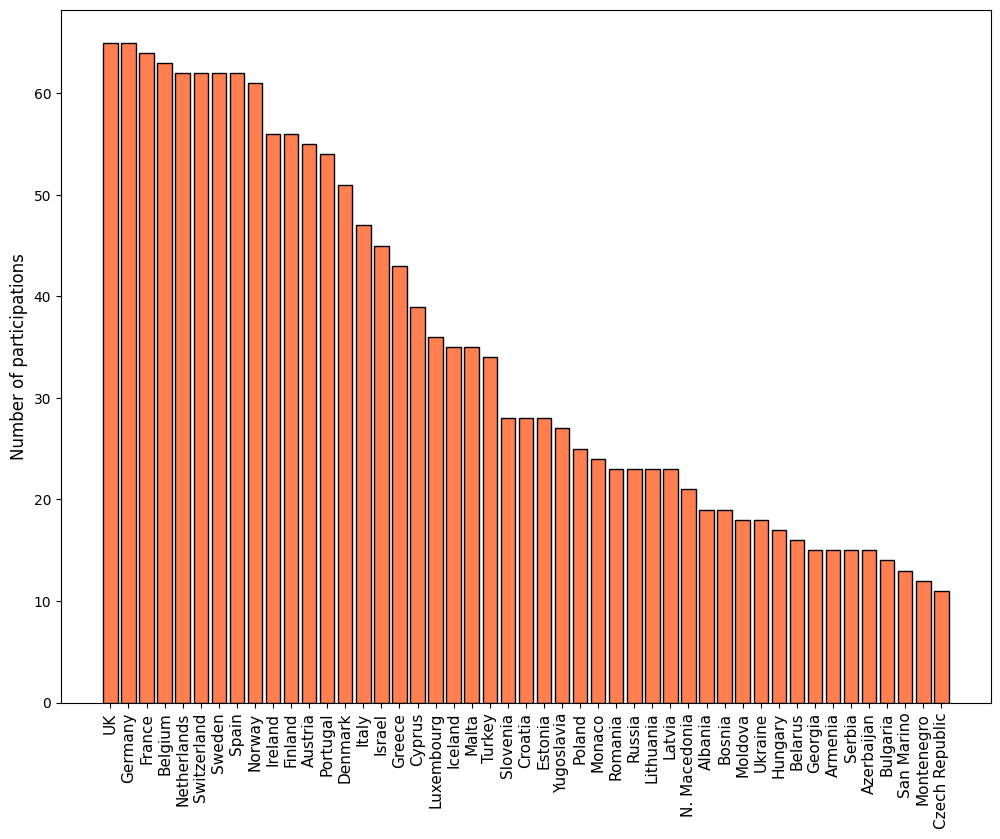

In [69]:
# Plot the number of participations of each country with a minimum of 10 participations
x = participation_counts[participation_counts['participation_count'] >= 10]

plt.figure(figsize=(12, 9))
plt.bar(x['country'], x['participation_count'], color='coral', edgecolor='k')
plt.xticks(rotation=90, fontsize=11)    
plt.ylabel('Number of participations', fontsize=12)
# plt.title('Number of participations of each country')
plt.savefig('Images/Number_of_participations_of_each_country.png')
plt.show()

In [70]:
countries = np.array(participation_counts['country'])
print('Countries:', countries)
print('Number of countries:', len(countries))

Countries: ['UK' 'Germany' 'France' 'Belgium' 'Netherlands' 'Switzerland' 'Sweden'
 'Spain' 'Norway' 'Ireland' 'Finland' 'Austria' 'Portugal' 'Denmark'
 'Italy' 'Israel' 'Greece' 'Cyprus' 'Luxembourg' 'Iceland' 'Malta'
 'Turkey' 'Slovenia' 'Croatia' 'Estonia' 'Yugoslavia' 'Poland' 'Monaco'
 'Romania' 'Russia' 'Lithuania' 'Latvia' 'N. Macedonia' 'Albania' 'Bosnia'
 'Moldova' 'Ukraine' 'Hungary' 'Belarus' 'Georgia' 'Armenia' 'Serbia'
 'Azerbaijan' 'Bulgaria' 'San Marino' 'Montenegro' 'Czech Republic'
 'Australia' 'Slovakia' 'Andorra' 'Serbia and Montenegro' 'Morocco'
 'World']
Number of countries: 53


### Number of wins

In [71]:
win_table = []
# Get the number of wins of each country by adding the points per year
for year in range(initial_year, final_year + 1):
    
    if year ==2020:
        # No eurovision in 2020
        continue
    df_year = df_final_round[df_final_round['year'] == year]
    table = df_year.groupby('to_country')['total_points'].sum().sort_values(ascending=False)

    if year == 1969:
        # The winner of 1969 was France, Spain, the United Kingdom and the Netherlands (all of the considered winners)
        winners = ['France', 'Spain', 'United Kingdom', 'Netherlands']
    elif year == 1991:
        # The winner was Sweden which draws with France
        winner = table.index[1]
    else:
        winner = table.index[0]
    points = table.iloc[0]
    win_table.append(winner)
    if winner=='Sweden':
        print(year, winner, points)
    

# Convert the result to a DataFrame
win_table = pd.DataFrame(win_table, columns=['country'])
win_table = win_table['country'].value_counts().reset_index()
win_table.columns = ['country', 'win_count']

1974 Sweden 24
1984 Sweden 145
1999 Sweden 163
2012 Sweden 372
2015 Sweden 365
2023 Sweden 583


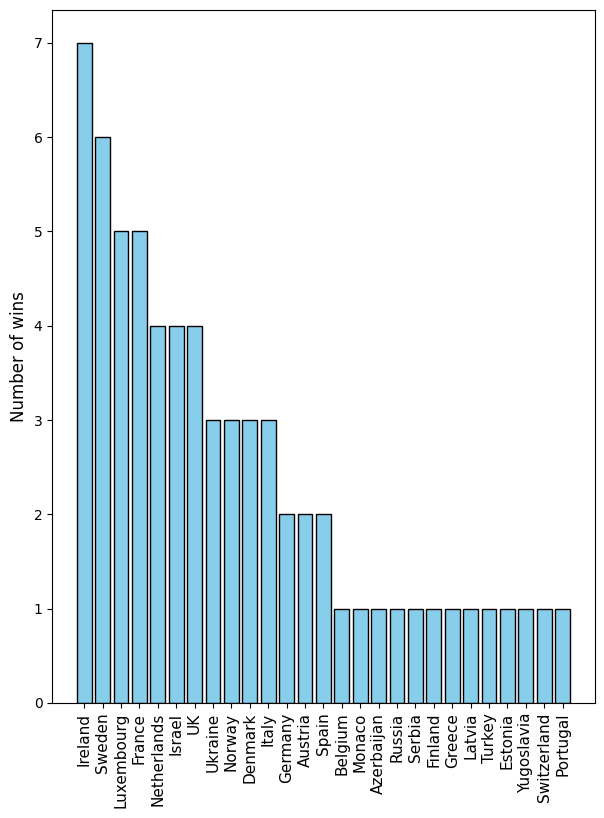

In [72]:

cw = win_table['win_count']
x = win_table['country']

idx_sort = cw.argsort()
cw = cw[idx_sort[::-1]]
x = x[idx_sort[::-1]]

plt.figure(figsize=(7, 9))
plt.bar(x, cw, color='skyblue', edgecolor='black')
plt.xticks(rotation=90, fontsize=11)
plt.ylabel('Number of wins', fontsize=12)
# plt.title('Winners of the Eurovision Song Contest')
plt.savefig('Images/Winners_of_the_Eurovision_Song_Contest.png')
plt.show()

C:\Users\mate1\AppData\Local\Temp\ipykernel_4180\3692086172.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(x['country'], rotation=90, fontsize=11)
C:\Users\mate1\AppData\Local\Temp\ipykernel_4180\3692086172.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(x, rotation=90, fontsize=11)


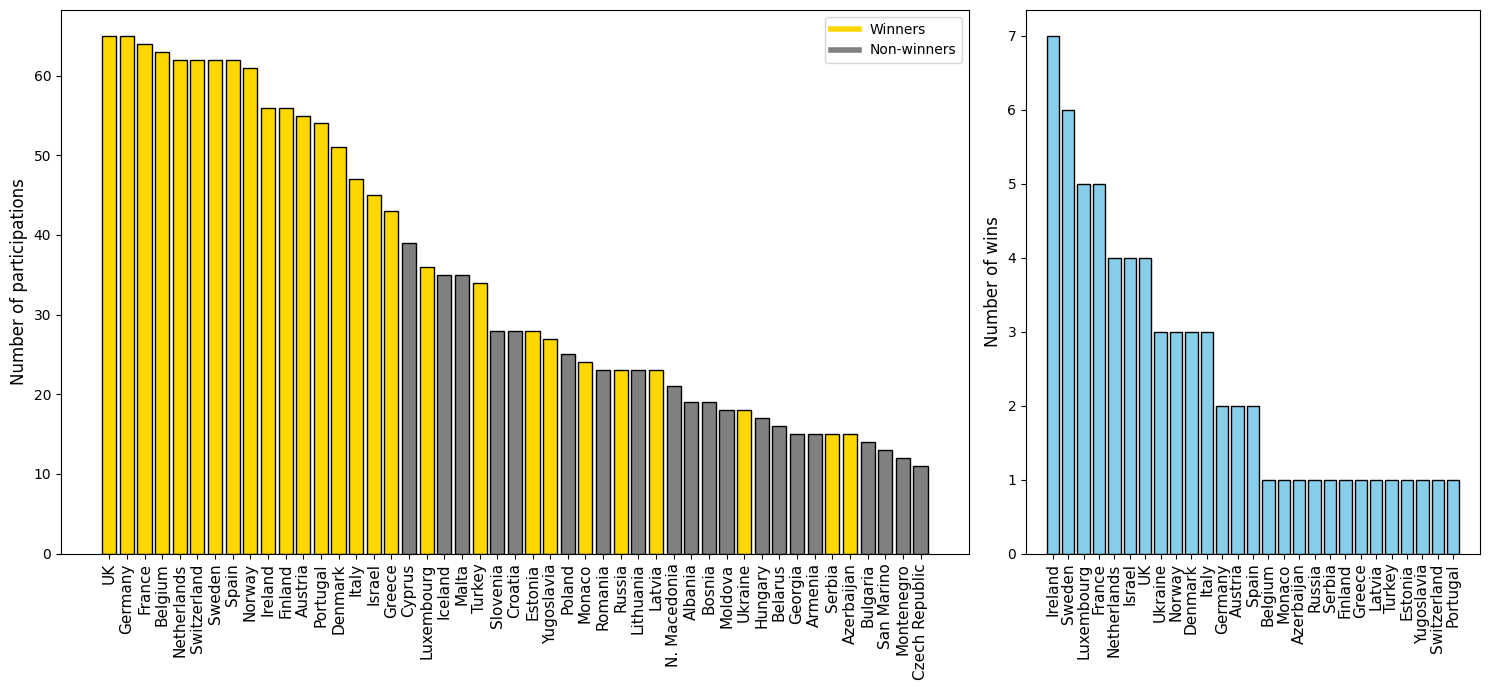

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7), width_ratios=[2, 1])

# Define the set of winning countries
winning_countries = set(win_table['country'])

# Plot the number of participations of each country with a minimum of 10 participations
x = participation_counts[participation_counts['participation_count'] >= 10]
colors = ['grey' if country not in winning_countries else 'gold' for country in x['country']]
ax[0].bar(x['country'], x['participation_count'], color=colors, edgecolor='k')
ax[0].set_xticklabels(x['country'], rotation=90, fontsize=11)
ax[0].set_ylabel('Number of participations', fontsize=12)


# Add a legend to indicate the significance of the colors
ax[0].legend(
    handles=[
        plt.Line2D([0], [0], color='gold', lw=4, label='Winners'),
        plt.Line2D([0], [0], color='grey', lw=4, label='Non-winners')
    ],
    loc='upper right'
)

# Plot the number of wins of each country
cw = win_table['win_count']
x = win_table['country']

idx_sort = cw.argsort()
cw = cw[idx_sort[::-1]]
x = x[idx_sort[::-1]]

ax[1].bar(x, cw, color='skyblue', edgecolor='black')
ax[1].set_xticklabels(x, rotation=90, fontsize=11)
ax[1].set_ylabel('Number of wins', fontsize=12)

plt.tight_layout()
plt.savefig('Images/Participations_and_wins.png')
plt.show()


In [74]:
# # Delete the countries with less than 10 participations
# participation_counts = participation_counts[participation_counts['participation_count'] >= 10]

# # Update the dataframe
# df_final_round = df_final_round[df_final_round['from_country'].isin(participation_counts['country'])]
# df_final_round = df_final_round[df_final_round['to_country'].isin(participation_counts['country'])]
# df_final_round

In [75]:
# Up to year 2015 put the total point given by a country to another country also in the jury points
df_final_round.loc[df_final_round['year'] <= 2015, 'jury_points'] = df_final_round.loc[df_final_round['year'] <= 2015]['total_points']
df_final_round

,year,round,from_country_id,to_country_id,from_country,to_country,total_points,tele_points,jury_points
0,1957,final,at,nl,Austria,Netherlands,6,NaN,6.0
1,1957,final,at,fr,Austria,France,0,NaN,0.0
2,1957,final,at,dk,Austria,Denmark,0,NaN,0.0
3,1957,final,at,lu,Austria,Luxembourg,3,NaN,3.0
4,1957,final,at,de,Austria,Germany,0,NaN,0.0
...,...,...,...,...,...,...,...,...,...
51349,2023,final,wld,al,World,Albania,6,6.0,NaN
51350,2023,final,wld,pt,World,Portugal,0,0.0,NaN
51351,2023,final,wld,rs,World,Serbia,0,0.0,NaN
51352,2023,final,wld,gb,World,UK,0,0.0,NaN


### Country analyzer

#### One country analyzer

Number of points given by Spain before 1997 and after 1997 + Boxplot of normalized points

In [76]:
# Function to obtain the number of points given for a given country during a time period

def family_points(df_final_round, country_id, initial_year, crop=15):
    
    # Get the number of points given by country_id to each country
    friends = df_final_round.query(f'year >= {initial_year} and from_country=="{country_id}"')
    
    fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(14,7))
    gs = axs[1,0].get_gridspec()
    for ax in axs[1,:]:
        ax.remove()
    axbig = fig.add_subplot(gs[1,:])
    
    def normalize(df):
        return df / df.sum()
    
    fig.suptitle(f'Points given by {country_id} to each country since {initial_year}', fontsize=16)
    # fig.tight_layout()


    # Plot the  normalized number of jury points given by country_id to each country
    friends1 = friends.groupby('to_country')['jury_points'].sum().sort_values(ascending=False)
    indices = friends1.index
    indices = indices[:crop]
    friends1 = normalize(friends1)
    friends1 = friends1.reset_index()
    friends1.columns = ['country', 'points']
    friends1 = friends1.head(crop)
    x = friends1['country']
    y = friends1['points']
    axs[0,0].bar(x, y, label='Jury')
    # axs[0,0].set_title(f'Normalized points given by {country_id} to each country')
    axs[0,0].set_xticklabels(x, rotation=90, fontsize=10)
    axs[0,0].set_ylabel('Normalized points', fontsize=12)
    axs[0,0].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, fontsize=12)
    
    
    # Plot the number of televote points given by country_id to each country
    friends2 = friends.groupby('to_country')['tele_points'].sum().sort_values(ascending=False)
    friends2 = friends2 / friends2.sum()
    friends2 = friends2.reset_index()
    friends2.columns = ['country', 'points']
    friends2 = friends2.head(crop)
    x = friends2['country']
    y = friends2['points']
    axs[0,1].bar(x, y, label='Televote', color='orange')
    # axs[0,1].set_title(f'Normalized Points given by {country_id} to each country')
    axs[0,1].set_xticklabels(x, rotation=90, fontsize=10)
    axs[0,1].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, fontsize=12)
    
    
    # Boxplot of the total points given by country_id to each country though the years
    friends_sorted = friends.groupby(['to_country', 'year'])['jury_points'].sum().reset_index()    
    # t = friends_sorted.groupby('to_country').sum().sort_values('jury_points', ascending=False).index
    # t = t[:crop]
    
    sns.boxplot(data=friends_sorted[friends_sorted['to_country'].isin(indices)], x='to_country', y='jury_points', order=indices, ax=axbig, palette='light:#5A9', linewidth=0.5, fliersize=2, medianprops={"color": "k", "linewidth": 1})
        
    axbig.set_xticklabels(axbig.get_xticklabels(), rotation=90, fontsize=10)
    axbig.set_ylabel('Points', fontsize=12)
    axbig.set_title(f'Jury points distribution over the years')
    axbig.set_xlabel('')
    
    
    plt.subplots_adjust(hspace=0.6)  # Adjust the spacing (increase for more space)
    plt.savefig(f'Images/{country_id}_points.png')

    plt.show()
    
    
    return 


C:\Users\mate1\AppData\Local\Temp\ipykernel_4180\1961262759.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0,0].set_xticklabels(x, rotation=90, fontsize=10)
C:\Users\mate1\AppData\Local\Temp\ipykernel_4180\1961262759.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0,1].set_xticklabels(x, rotation=90, fontsize=10)
C:\Users\mate1\AppData\Local\Temp\ipykernel_4180\1961262759.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=friends_sorted[friends_sorted['to_country'].isin(indices)], x='to_country', y='jury_points', order=indices, ax=axbig, palette='light:#5A9', linewidth=0.5, fliersize=2, medianprops={"color": "k", "linewidth": 1})
C:\Users\mate1\Ap

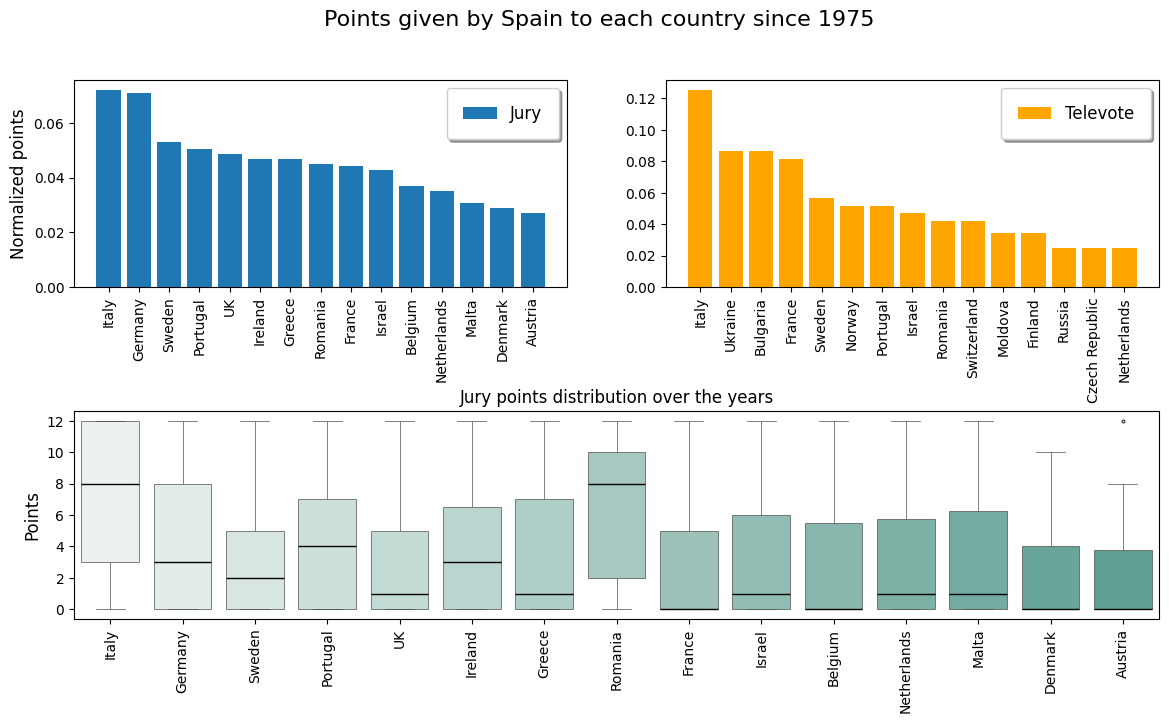

In [77]:
family_points(df_final_round, country_id='Spain', initial_year=1975)

C:\Users\mate1\AppData\Local\Temp\ipykernel_4180\1961262759.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0,0].set_xticklabels(x, rotation=90, fontsize=10)
C:\Users\mate1\AppData\Local\Temp\ipykernel_4180\1961262759.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0,1].set_xticklabels(x, rotation=90, fontsize=10)
C:\Users\mate1\AppData\Local\Temp\ipykernel_4180\1961262759.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=friends_sorted[friends_sorted['to_country'].isin(indices)], x='to_country', y='jury_points', order=indices, ax=axbig, palette='light:#5A9', linewidth=0.5, fliersize=2, medianprops={"color": "k", "linewidth": 1})
C:\Users\mate1\Ap

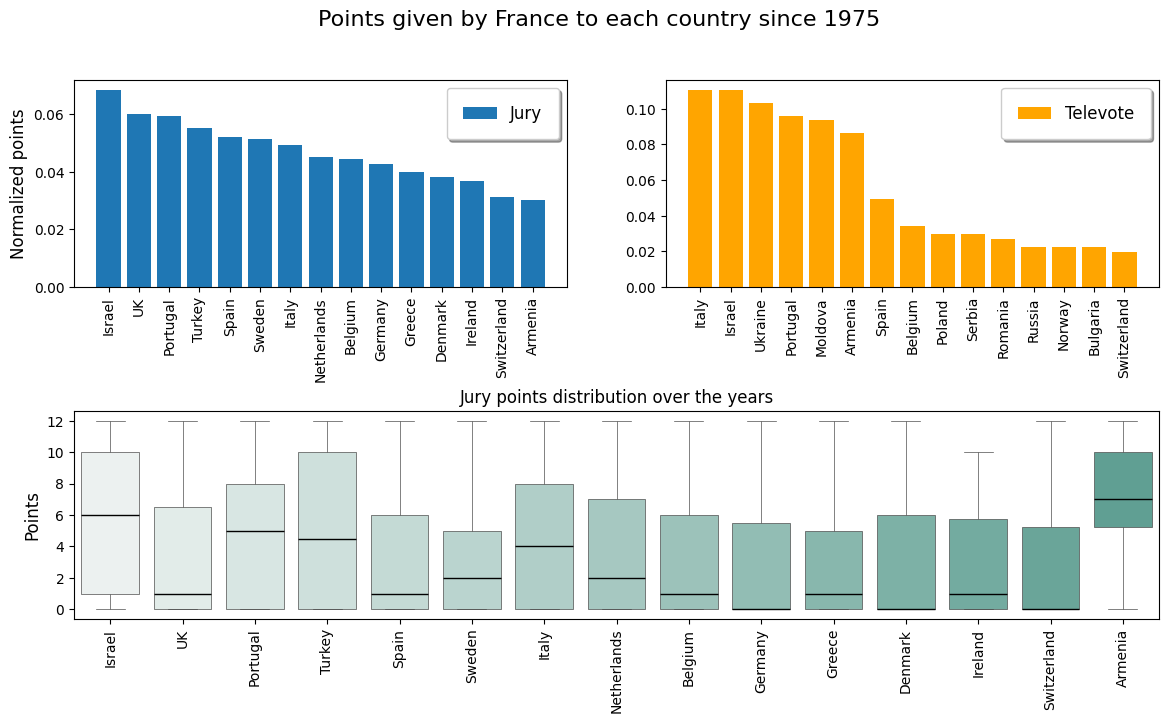

In [78]:
family_points(df_final_round, country_id='France', initial_year=1975)

C:\Users\mate1\AppData\Local\Temp\ipykernel_4180\1961262759.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0,0].set_xticklabels(x, rotation=90, fontsize=10)
C:\Users\mate1\AppData\Local\Temp\ipykernel_4180\1961262759.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0,1].set_xticklabels(x, rotation=90, fontsize=10)
C:\Users\mate1\AppData\Local\Temp\ipykernel_4180\1961262759.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=friends_sorted[friends_sorted['to_country'].isin(indices)], x='to_country', y='jury_points', order=indices, ax=axbig, palette='light:#5A9', linewidth=0.5, fliersize=2, medianprops={"color": "k", "linewidth": 1})
C:\Users\mate1\Ap

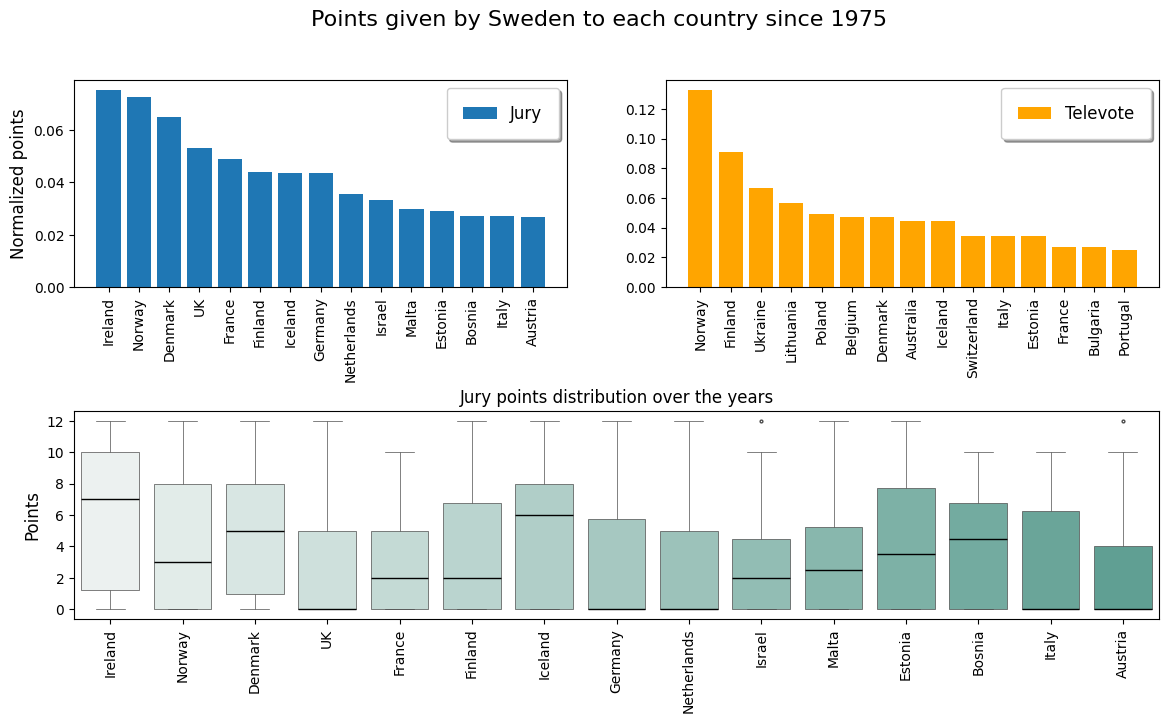

In [79]:
family_points(df_final_round, country_id='Sweden', initial_year=1975)

## Analysis

### Tree diagram of cohesion cluster analysis

In this cluster analysis we compare the voting portfolios between countries for different range of years, by applying the Wards method and euclidean distance which produce the least biased results. The Warts method seeks to minimize the total within-cluster variance as clusters are merged. At each step of the algorithm:

- It computes the increase in total within-cluster variance that would result from merging any two clusters.
- It selects the pair of clusters whose merging causes the smallest increase in this variance.

This leads to a hierarchy of clusters, visualized as a dendrogram.

### Study of Bias

We define quality as the average aggregate number of points from all the other country juries to song $C_j$ in year $t$:

$$\text{Quality}\quad C_{jt} = \frac{1}{p-2}\sum_{p\neq i,j} C_{ijt}$$

Thenb, the bias is defined as:

$$\text{Bias} \, C_{ijt} = \text{Vote} \, C_{ijt} - \text{Quality} \, C_{jt}$$

In [80]:
def bias_dyads(df, initial_year, final_year, N_top=15):
    
    # Filter the data
    df_filtered = df[(df['year'] >= initial_year) & (df['year'] <= final_year)]
    participations = participation_counts_f(df, initial_year, final_year)
    
    # Delete the countries with less than 10 participations
    participations = participations[participations['participation_count'] >= 5]
    
    # Update the dataframe
    df_filtered = df_filtered[df_filtered['from_country'].isin(participations['country'])]
    
    # Obtain the total points given by each country to each other
    given_points_yearly = df_filtered.groupby(['year', 'to_country'])['jury_points'].sum().unstack().fillna(0)
    
    # Obtain the number of participants of each year
    participants = df_filtered.groupby('year')['from_country'].nunique()
    
    # Create a dataframe to store the quality of country song per year
    quality = pd.DataFrame(0.0, index=participants.index, columns=given_points_yearly.columns)
    
    # Compute the quality of the song of each country per year
    for year in participants.index:
        for country in given_points_yearly.columns:
            quality.loc[year, country] = given_points_yearly.loc[year, country] / (participants.loc[year] - 2)
    
    # Compute the average bias of each country to each other
    bias = pd.DataFrame(0.0, index=given_points_yearly.columns, columns=given_points_yearly.columns)
    counts = pd.DataFrame(0, index=given_points_yearly.columns, columns=given_points_yearly.columns)
    p_values = pd.DataFrame(0.0, index=given_points_yearly.columns, columns=given_points_yearly.columns)
    
    for country in given_points_yearly.columns:
        for country2 in given_points_yearly.columns:
            if country != country2:
                total_bias = 0
                count = 0
                all_biases = []
                for year in participants.index:
                    # Check if both countries participated in the same year
                    countries_in_year = df_filtered[df_filtered['year'] == year]['to_country'].values
                    if country in countries_in_year and country2 in countries_in_year:
                        points_between = df_filtered[
                            (df_filtered['year'] == year) & 
                            (df_filtered['from_country'] == country) & 
                            (df_filtered['to_country'] == country2)
                        ]['jury_points'].sum()  # Ensure it sums to a scalar value
                        
                        # Compute bias for this year
                        b = points_between - quality.loc[year, country2]
                        all_biases.append(b)
                        total_bias += b
                        count += 1
                        
                # Perform t-test for p-values
                t_stat, p_value = stats.ttest_1samp(all_biases, 0)  # Test against 0 (null hypothesis)
                
                # Store the results
                p_values.loc[country, country2] = p_value
                counts.loc[country, country2] = count
                if count > 0:
                    bias.loc[country, country2] = round(total_bias / count, 2)
    
    # Ensure index names are set correctly
    bias.index = bias.index.rename('from_country')
    counts.index = counts.index.rename('from_country')
    p_values.index = p_values.index.rename('from_country')

    # Reset index and reshape the DataFrame using .melt()
    bias_reset = bias.reset_index().melt(id_vars=['from_country'], value_vars=bias.columns, var_name='to_country', value_name='bias')
    counts_reset = counts.reset_index().melt(id_vars=['from_country'], value_vars=counts.columns, var_name='to_country', value_name='count')
    p_values_reset = p_values.reset_index().melt(id_vars=['from_country'], value_vars=p_values.columns, var_name='to_country', value_name='p_value')


    # Merge the bias, counts and p-values into a single DataFrame
    result = pd.merge(bias_reset, counts_reset, on=['from_country', 'to_country'])
    result = pd.merge(result, p_values_reset, on=['from_country', 'to_country'])

    # Sort based on biased dyads
    result = result.sort_values('bias', ascending=False)
    result = result[result['count'] > 1]
    # result = result.head(N_top)
    
    return result


In [85]:
bias1 = bias_dyads(df_final_round, initial_year=1998, final_year=2023)
bias1.head(15)

c:\Users\mate1\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\Users\mate1\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\Users\mate1\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\mate1\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,from_country,to_country,bias,count,p_value
488,Greece,Cyprus,10.05,11,3.701563e-10
856,Cyprus,Greece,9.16,11,1.281611e-07
1317,Armenia,Montenegro,8.89,2,1.442667e-01
29,N. Macedonia,Albania,8.72,4,1.588130e-03
1303,Romania,Moldova,8.27,10,3.450278e-05
2072,Azerbaijan,Turkey,8.20,4,3.127040e-04
1400,Serbia,N. Macedonia,8.02,3,2.594998e-02
232,Turkey,Azerbaijan,7.98,4,3.047516e-04
1625,Moldova,Romania,7.71,10,1.101450e-04
777,Lithuania,Georgia,7.64,5,1.101567e-03


In [92]:
print(bias1.head(15).to_latex(index=False, float_format="{:.2f}".format))

\begin{tabular}{llrrr}
\toprule
from_country & to_country & bias & count & p_value \\
\midrule
Greece & Cyprus & 10.05 & 11 & 0.00 \\
Cyprus & Greece & 9.16 & 11 & 0.00 \\
Armenia & Montenegro & 8.89 & 2 & 0.14 \\
N. Macedonia & Albania & 8.72 & 4 & 0.00 \\
Romania & Moldova & 8.27 & 10 & 0.00 \\
Azerbaijan & Turkey & 8.20 & 4 & 0.00 \\
Serbia & N. Macedonia & 8.02 & 3 & 0.03 \\
Turkey & Azerbaijan & 7.98 & 4 & 0.00 \\
Moldova & Romania & 7.71 & 10 & 0.00 \\
Lithuania & Georgia & 7.64 & 5 & 0.00 \\
Serbia & Bosnia & 7.57 & 5 & 0.00 \\
Croatia & Bosnia & 7.43 & 9 & 0.00 \\
Slovenia & Montenegro & 7.39 & 2 & 0.12 \\
Armenia & Georgia & 7.36 & 6 & 0.00 \\
Bosnia & Serbia & 7.21 & 5 & 0.00 \\
\bottomrule
\end{tabular}



In [83]:
bias2 = bias_dyads(df_final_round, initial_year=1975, final_year=1997)
bias2.head(10)

c:\Users\mate1\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\Users\mate1\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\Users\mate1\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\mate1\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,from_country,to_country,bias,count,p_value
963,Malta,Slovakia,9.12,2,1.336411e-01
354,Cyprus,Greece,8.13,13,6.851667e-09
150,Greece,Cyprus,6.54,13,4.281141e-06
102,Turkey,Bosnia,6.24,4,3.975076e-02
633,Croatia,Malta,5.02,5,2.985813e-02
123,Malta,Croatia,4.80,5,6.728513e-02
931,Netherlands,Russia,4.74,2,3.077353e-01
613,Malta,Luxembourg,4.42,4,2.333770e-01
549,Portugal,Italy,4.31,17,4.888625e-05
1138,Malta,Turkey,4.02,7,1.465089e-02


In [90]:
print(bias2.head(15).to_latex(index=False, float_format="{:.2f}".format))

\begin{tabular}{llrrr}
\toprule
from_country & to_country & bias & count & p_value \\
\midrule
Malta & Slovakia & 9.12 & 2 & 0.13 \\
Cyprus & Greece & 8.13 & 13 & 0.00 \\
Greece & Cyprus & 6.54 & 13 & 0.00 \\
Turkey & Bosnia & 6.24 & 4 & 0.04 \\
Croatia & Malta & 5.02 & 5 & 0.03 \\
Malta & Croatia & 4.80 & 5 & 0.07 \\
Netherlands & Russia & 4.74 & 2 & 0.31 \\
Malta & Luxembourg & 4.42 & 4 & 0.23 \\
Portugal & Italy & 4.31 & 17 & 0.00 \\
Malta & Turkey & 4.02 & 7 & 0.01 \\
UK & Estonia & 3.86 & 3 & 0.19 \\
Finland & Estonia & 3.70 & 2 & 0.51 \\
Denmark & Monaco & 3.67 & 2 & 0.07 \\
Bosnia & Slovenia & 3.60 & 4 & 0.08 \\
Turkey & Yugoslavia & 3.50 & 12 & 0.00 \\
\bottomrule
\end{tabular}



Now we are ineterested in studying how different are the voting portfolios between different countries. First we compute the number of points given for all the countries to each country and normalize. Then, we compute the correlation matrix between countries based on their portfolios. After that, we compute the distance between correlations and plot a dendogram.

In [93]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import fcluster
import scipy.cluster.hierarchy as sch

In [128]:
# Convert correlation matrix to distance matrix
def correlation_to_distance(corr):
    return np.sqrt(2 * (1 - corr))

# Correlation function
def correlation(df, initial_year, final_year, bootstraping=1000):
    
    # Filter data in time
    friends = df.query(f'year >= {initial_year} and year <= {final_year}')
    participations = participation_counts_f(df, initial_year, final_year)
    
    # # Delete the countries with less than 10 participations
    participations = participations[participations['participation_count'] > 1]

    # # Update the dataframe
    friends = friends[friends['from_country'].isin(participations['country'])]
    friends = friends[friends['to_country'].isin(participations['country'])]
    
    # Get the number of points given by each country to each country
    friends = friends.groupby(['from_country', 'to_country'])['jury_points'].mean().unstack().fillna(0)
    
    # Get the correlation matrix
    corr = friends.T.corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, cmap='coolwarm', annot=False) 
    plt.title('Correlation matrix of the points given by each country to each country')
    plt.xlabel('Country')
    plt.ylabel('Country')
    plt.show()
    
    return corr

def boots_correlation(df, initial_year, final_year, bootstraping=1000):
    
    # Filter data within the specified time range
    friends = df.query(f'year >= {initial_year} and year <= {final_year}')
    participations = participation_counts_f(df, initial_year, final_year)
    
    # Remove countries with fewer than 7 participations
    participations = participations[participations['participation_count'] > 5]
    valid_countries = participations['country']
    
    # Filter valid countries
    friends = friends[friends['from_country'].isin(valid_countries)]
    # friends = friends[friends['to_country'].isin(valid_countries)]
    
    # Create a pivot table of mean jury points
    sampled = friends.groupby(['from_country', 'to_country'])['jury_points'].mean().unstack().fillna(0)
    
    # Store bootstrapped correlation matrices
    bootstraped_corr = []
    full_index = sampled.index  # Full list of countries

    for _ in range(bootstraping):
        
        # Resample original data with replacement
        resample_pivot = sampled.sample(frac=1, replace=True, axis=1)
        
        # Calculate the correlation matrix
        resample_corr = resample_pivot.T.corr(method='pearson')
        resample_corr = resample_corr.fillna(0)
        
        # Reindex to ensure consistent shape
        bootstraped_corr.append(resample_corr.values)

    # Compute the mean correlation matrix from bootstraps
    mean_c = np.mean(bootstraped_corr, axis=0)
    mean_correlation = pd.DataFrame(mean_c, index=full_index, columns=full_index)
    
    # Plot the heatmap
    plt.figure(figsize=(14, 10))
    sns.heatmap(mean_correlation, cmap='seismic', annot=False, xticklabels=True, yticklabels=True, vmin=-1, vmax=1)
    # plt.title('Mean Correlation Matrix of voting portfolios')
    plt.xlabel('')
    plt.ylabel('')
    
    plt.savefig(f'Images/Mean_Correlation_Matrix_from_{initial_year}_to_{final_year}.png')

    plt.show()
    
    return mean_correlation


# Hierarchical clustering function
def hierarchical_clustering(corr):
    
    # Convert correlation matrix to distance matrix
    dist = correlation_to_distance(corr)
    
    plt.figure(figsize=(12, 6))
    sns.heatmap(dist, cmap='coolwarm', annot=False)
    plt.title('Distance matrix of the points given by each country to each country')
    
    # Flatten the distance matrix
    dist = squareform(dist, checks=False)
    
    # Perform hierarchical clustering non-euclidean distance
    Z = linkage(dist, method='ward', metric='euclidean')

    return Z, corr

def plotting_dendrogram(Z, corr, threshold=0.5):
    
    # Plot the dendrogram
    plt.figure(figsize=(14, 10))
    sch.dendrogram(Z, labels=corr.index, orientation='right', color_threshold=threshold, leaf_font_size=11)
    plt.axvline(x=threshold, color='black', linestyle='--')
    plt.xlim(Z[:, 2].min()-0.1, Z[:, 2].max()+0.1)
    # plt.title('Dendrogram of the points given by each country to each country')
    plt.savefig(f'Images/Dendrogram_from_{initial_year}_to_{final_year}.png')
    plt.show()
    
    return

def get_clusters(Z, corr, cutoff_distance):
    
    # Get the cluster labels
    cluster_labels = fcluster(Z, t=cutoff_distance, criterion='distance')
    # Create a DataFrame with the cluster labels
    clusters = pd.DataFrame(cluster_labels, index=corr.index, columns=['cluster'])
    clusters = clusters.sort_values('cluster')
    
    return clusters

def bias_among_cluster(cluster, df, initial_year, final_year):
    
    # Filter the data
    df_filtered = df[(df['year'] >= initial_year) & (df['year'] <= final_year)]
    participations = participation_counts_f(df, initial_year, final_year)
    
    # Delete the countries with less than 5 participations
    participations = participations[participations['participation_count'] > 5]
    
    # Update the dataframe
    df_filtered = df_filtered[df_filtered['from_country'].isin(participations['country'])]
    # df_filtered = df_filtered[df_filtered['to_country'].isin(participations['country'])]
    
    # Obtain the total points given by each country to each other
    given_points_yearly = df_filtered.groupby(['year', 'to_country'])['jury_points'].sum().unstack().fillna(0)
    
    # Obtain the number of participants of each year
    participants = df_filtered.groupby('year')['from_country'].nunique()
    
    # Create a dataframe to store the quality of country song per year
    quality = pd.DataFrame(0.0, index=participants.index, columns=given_points_yearly.columns)
    
    # Compute the quality of the song of each country per year
    for year in participants.index:
        for country in given_points_yearly.columns:
            quality.loc[year, country] = given_points_yearly.loc[year, country] / (participants.loc[year] - 2)

    # Get the different clusters
    cluster_types = cluster['cluster'].unique()
    
    # Create a DataFrame to store the results
    results = pd.DataFrame(np.nan, index=cluster_types, columns=participants.index)
    p_values = pd.DataFrame(np.nan, index=cluster_types, columns=participants.index)
    
    for c in cluster_types:
        
        # Get the countries in the cluster
        countries = cluster[cluster['cluster'] == c].index
        
        for year in participants.index:
            total_bias = 0
            count = 0
            all_biases = []
            for country in countries:
                for country2 in countries:
                    if country != country2:
                        # Check if both countries participated in the same year
                        countries_in_year = df_filtered[df_filtered['year'] == year]['to_country'].values
                        if country in countries_in_year and country2 in countries_in_year:
                            points_between = df_filtered[
                                    (df_filtered['year'] == year) & 
                                    (df_filtered['from_country'] == country) & 
                                    (df_filtered['to_country'] == country2)
                                ]['jury_points'].sum()
                                
                            # Compute bias for this year
                            b = points_between - quality.loc[year, country2]
                            all_biases.append(b)
                            total_bias += b
                            count += 1
                            
            # Perform t-test for p-values
            t_stat, p_value = stats.ttest_1samp(all_biases, 0)
                    
            # Store the results
            p_values.loc[c, year] = p_value
            results.loc[c, year] = total_bias / count if count > 0 else np.nan
        
    return results, p_values

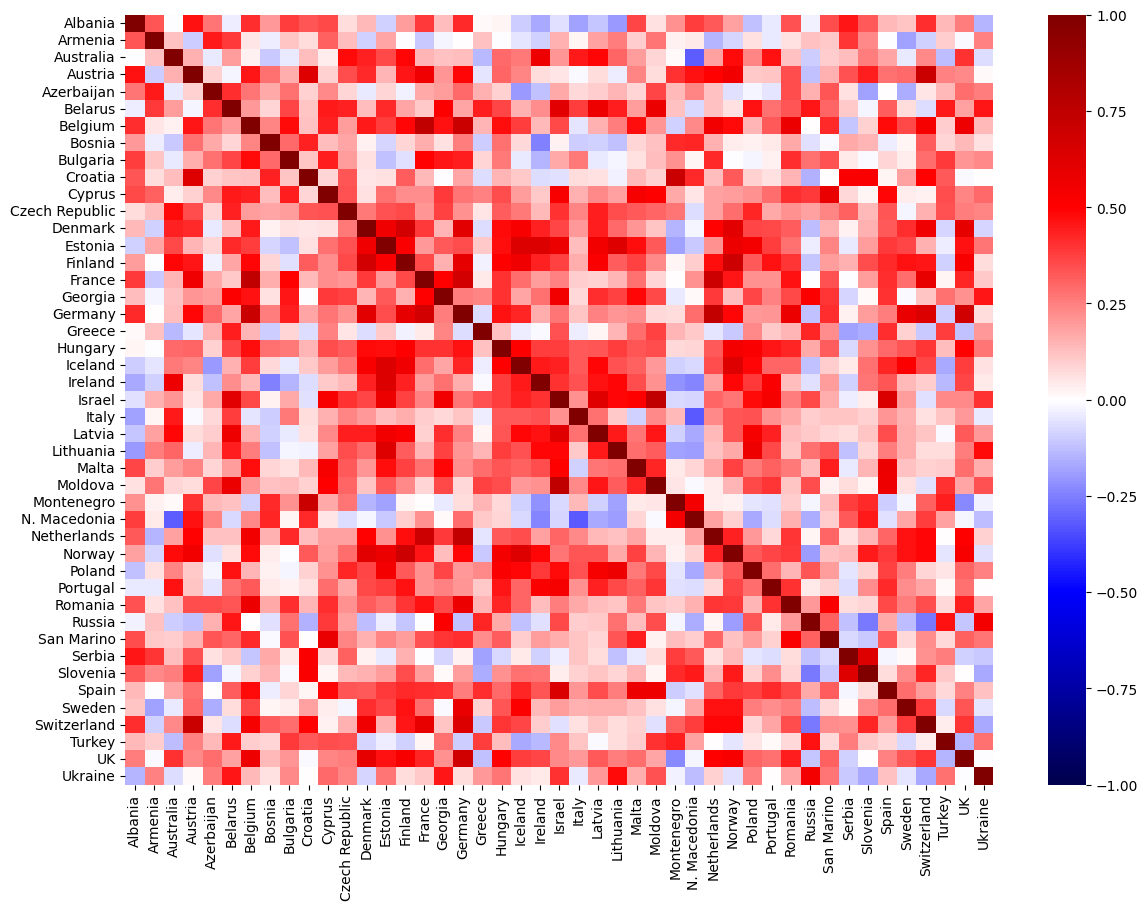

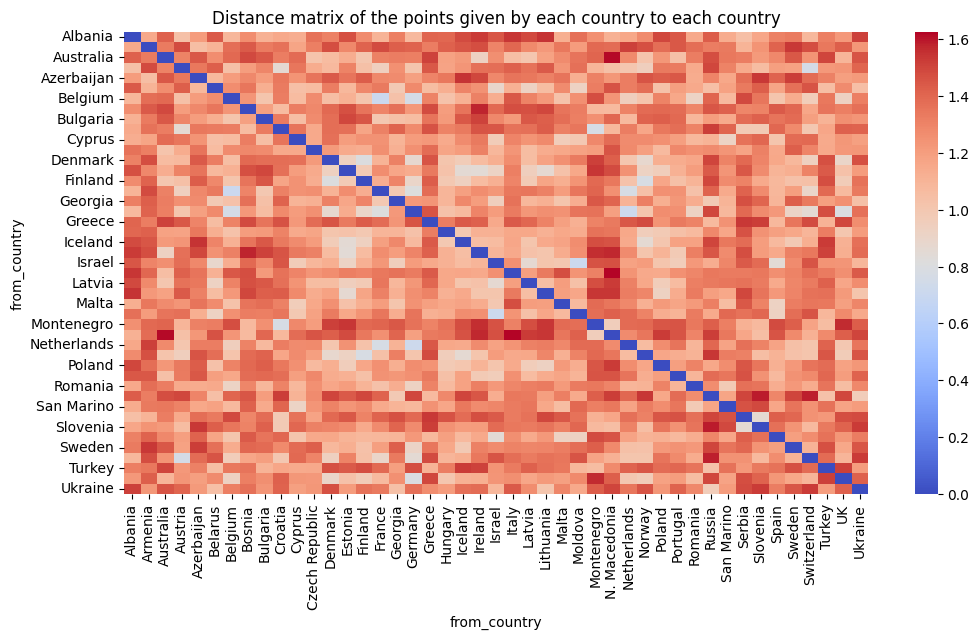

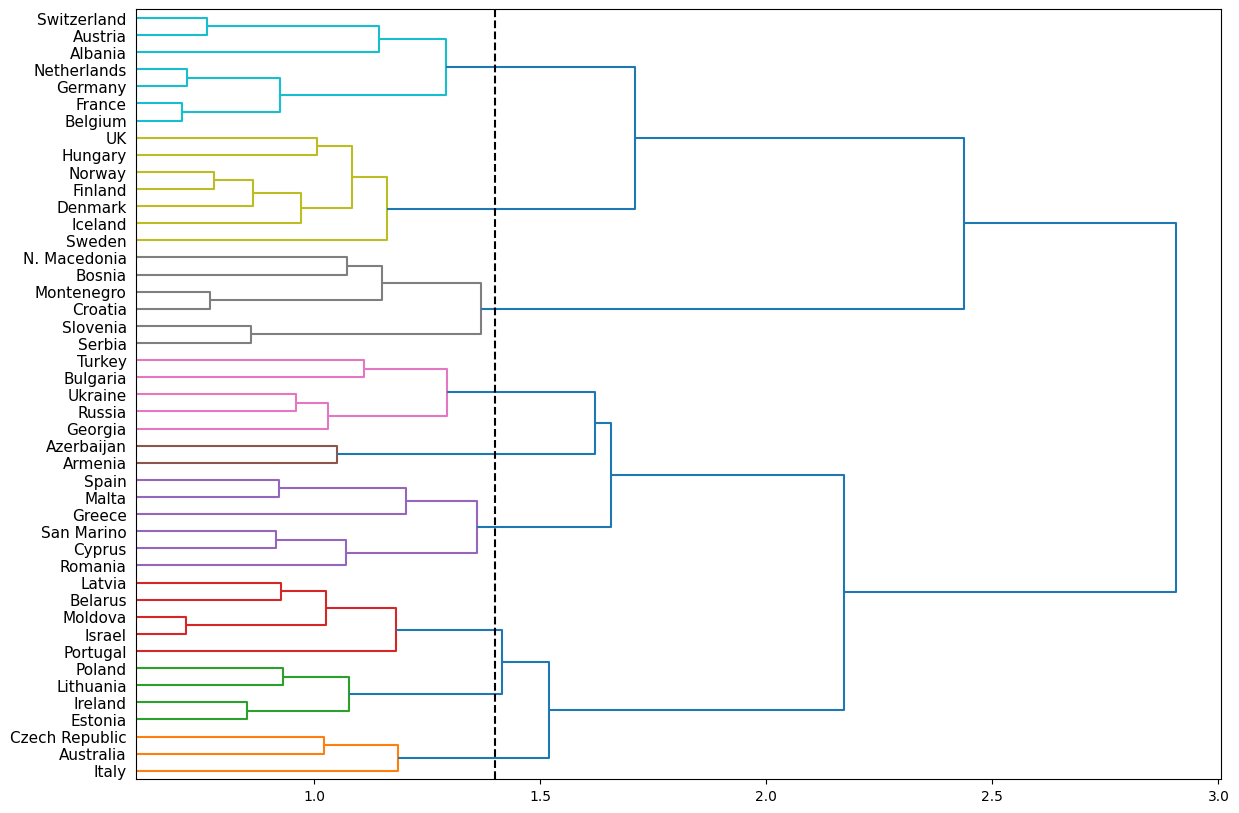

array([[ 6.        , 15.        ,  0.70750827,  2.        ],
       [22.        , 27.        ,  0.71620847,  2.        ],
       [17.        , 30.        ,  0.71828323,  2.        ],
       [ 3.        , 41.        ,  0.76242821,  2.        ],
       [ 9.        , 28.        ,  0.7700298 ,  2.        ],
       [14.        , 31.        ,  0.77826688,  2.        ],
       [13.        , 21.        ,  0.85136156,  2.        ],
       [37.        , 38.        ,  0.86083515,  2.        ],
       [12.        , 50.        ,  0.86550804,  3.        ],
       [10.        , 36.        ,  0.91513783,  2.        ],
       [26.        , 39.        ,  0.92243435,  2.        ],
       [45.        , 47.        ,  0.92404374,  4.        ],
       [ 5.        , 24.        ,  0.92721059,  2.        ],
       [25.        , 32.        ,  0.93064052,  2.        ],
       [35.        , 44.        ,  0.95968422,  2.        ],
       [20.        , 53.        ,  0.97213111,  4.        ],
       [19.        , 43.

In [129]:
threshold = 1.4
Z, corr = hierarchical_clustering(boots_correlation(df_final_round, initial_year=2006, final_year=2023))
plotting_dendrogram(Z, corr, threshold)
Z[Z[:, 2] < threshold]

In [47]:
cluster = get_clusters(Z, corr, cutoff_distance=threshold)

cluster

# results, p_values = bias_among_cluster(cluster, df_final_round, initial_year=1998, final_year=2023)
# results

,cluster
from_country,
Australia,1
Italy,1
Czech Republic,1
Israel,2
Moldova,2
Latvia,2
Belarus,2
Lithuania,3
Ireland,3


In [48]:
from scipy.stats import binomtest

In [49]:
def cluster_voting_prob(df, cluster, initial_year, final_year, cluster_id):
    
    # Filter the data
    df_filtered = df[(df['year'] >= initial_year) & (df['year'] <= final_year)]
    cluster = cluster.sort_values('cluster')
    type_clusters = cluster['cluster'].unique()
    years = df_filtered['year'].unique()
    
    # Get the countries in the cluster
    countries  = cluster[cluster['cluster'] == cluster_id].index 
    
    # Create a DataFrame to store the results
    iterables = [[c for c in countries], ["Random", "Observed", "p-value"]]
    multi = pd.MultiIndex.from_product(iterables, names=["To Country", "Probability"])
    table = pd.DataFrame(np.nan, index=[countries], columns=multi)
    
    for country in countries:
        for country2 in countries:
            if country != country2:
                obs_prob = 0
                rand_prob = 0
                n = 0
                for year in years:
                    # Check if both countries participated in the same year
                    countries_in_year = df_filtered[df_filtered['year'] == year]['to_country'].values
                    if country in countries_in_year and country2 in countries_in_year:
                        points_between = df_filtered[
                                (df_filtered['year'] == year) & 
                                (df_filtered['from_country'] == country) & 
                                (df_filtered['to_country'] == country2)
                            ]['jury_points'].sum()
                        if points_between > 0:
                            obs_prob += 1
                        n += 1
                        
                        # Random probability
                        n_participants = df_filtered[df_filtered['year'] == year]['to_country'].nunique()
                        rand_prob += 10 / (n_participants-1)
                
                if n>0:
                    # P value
                    p_value = binomtest(obs_prob, n, p = rand_prob / n, alternative='greater').pvalue
                
                # Store the results
                table.loc[country, (country2, "Random")] = rand_prob / n if n > 0 else 0
                table.loc[country, (country2, "Observed")] = obs_prob / n if n > 0 else 0
                table.loc[country, (country2, "p-value")] = p_value if n > 0 else np.nan
                        
    return table
    

In [50]:
def voting_prob(df, initial_year, final_year):
    
    # Filter the data
    df_filtered = df[(df['year'] >= initial_year) & (df['year'] <= final_year)]
    # Delete the countries with less than 10 participations
    participations = participation_counts_f(df, initial_year, final_year)
    participations = participations[participations['participation_count'] > 5]
    
    df_filtered = df_filtered[df_filtered['from_country'].isin(participations['country'])]
    df_filtered = df_filtered[df_filtered['to_country'].isin(participations['country'])]
    
    
    countries = df_filtered['to_country'].unique()
    years = df_filtered['year'].unique()
    
    # Create a DataFrame to store the results
    iterables = [[c for c in countries], ["Random", "Observed", "p value"]]
    multi = pd.MultiIndex.from_product(iterables, names=["To Country", "Probability"])
    table = pd.DataFrame(np.nan, index=[countries], columns=multi)
    
    for country in countries:
        for country2 in countries:
            if country != country2:
                obs_prob = 0
                rand_prob = 0
                n = 0
                for year in years:
                    # Check if both countries participated in the same year
                    countries_in_year = df_filtered[df_filtered['year'] == year]['to_country'].values
                    if country in countries_in_year and country2 in countries_in_year:
                        points_between = df_filtered[
                                (df_filtered['year'] == year) & 
                                (df_filtered['from_country'] == country) & 
                                (df_filtered['to_country'] == country2)
                            ]['jury_points'].sum()
                        if points_between > 0:
                            obs_prob += 1
                        n += 1
                        
                        # Random probability
                        n_participants = df_filtered[df_filtered['year'] == year]['to_country'].nunique()
                        rand_prob += 10 / (n_participants-1)
                
                if n>0:
                    # P value
                    p_value = binomtest(obs_prob, n, p = rand_prob / n, alternative='greater').pvalue
                
                # Store the results
                table.loc[country, (country2, "Random")] = rand_prob / n if n > 0 else 0
                table.loc[country, (country2, "Observed")] = obs_prob / n if n > 0 else 0
                table.loc[country, (country2, "p value")] = p_value if n > 0 else np.nan
                
    return table

In [57]:
cluster_voting_prob(df_final_round, cluster, initial_year=2006, final_year=2023, cluster_id=8)

To Country       Iceland                        Sweden                      \
Probability       Random  Observed   p-value    Random  Observed   p-value   
from_country                                                                 
Iceland              NaN       NaN       NaN  0.407407  0.888889  0.004357   
Sweden          0.407407  0.666667  0.107841       NaN       NaN       NaN   
United Kingdom  0.408333  0.600000  0.180510  0.407553  0.687500  0.022293   
Finland         0.409524  0.714286  0.105766  0.412385  1.000000  0.000059   
Denmark         0.408333  0.875000  0.009732  0.408478  1.000000  0.000129   
Norway          0.407407  0.777778  0.027909  0.405338  1.000000  0.000008   

To Country     United Kingdom                       Finland            \
Probability            Random  Observed   p-value    Random  Observed   
from_country                                                            
Iceland              0.408333  0.300000  0.845776  0.409524  0.714286   
Sweden               0.407553  0.187500  0.984153  0.412385  0.727273   
United Kingdom            NaN       NaN       NaN  0.412385  0.363636   
Finland              0.412385  0.181818  0.974851       NaN       NaN   
Denmark              0.409223  0.363636  0.725101  0.412112  0.571429   
Norway               0.406147  0.428571  0.533141  0.409420  0.444444   

To Country                 Denmark                        Norway            \
Probability      p-value    Random  Observed   p-value    Random  Observed   
from_country                                                                 
Iceland         0.105766  0.408333  0.875000  0.009732  0.407407  0.666667   
Sweden          0.035530  0.408478  0.600000  0.180765  0.405338  0.923077   
United Kingdom  0.732234  0.409223  0.636364  0.111100  0.406147  0.214286   
Finland              NaN  0.412112  0.571429  0.313575  0.409420  0.666667   
Denmark         0.313575       NaN       NaN       NaN  0.408478  0.800000   
Norway          0.540915  0.408478  0.900000  0.002002       NaN       NaN   

To Country                
Probability      p-value  
from_country              
Iceland         0.107841  
Sweden          0.000160  
United Kingdom  0.963949  
Finland         0.110227  
Denmark         0.014206  
Norway               NaN

In [58]:
voting_p = voting_prob(df_final_round, initial_year=2006, final_year=2023)
voting_p

To Country        Finland                        Russia                      \
Probability        Random  Observed   p value    Random  Observed   p value   
Finland               NaN       NaN       NaN  0.414946  0.625000  0.197667   
Russia           0.414946  0.125000  0.986273       NaN       NaN       NaN   
Bosnia           0.423913  0.200000  0.936549  0.419462  0.571429  0.328323   
Romania          0.417029  0.125000  0.986659  0.412085  0.500000  0.397486   
Sweden           0.412385  0.727273  0.035530  0.408682  0.666667  0.064959   
Lithuania        0.413285  0.444444  0.550497  0.409724  0.666667  0.110590   
Ukraine          0.412385  0.090909  0.997116  0.412385  0.818182  0.007529   
Armenia          0.414946  0.125000  0.986273  0.411576  1.000000  0.000339   
Greece           0.415137  0.111111  0.991993  0.410071  0.750000  0.018311   
Ireland          0.417246  0.400000  0.692188  0.417150  0.666667  0.203746   
Turkey           0.425725  0.250000  0.891237  0.419928  1.000000  0.005483   
North Macedonia  0.434783  0.500000  0.680529  0.417391  1.000000  0.030351   
Croatia          0.417029  0.500000  0.554002  0.417029  0.750000  0.199370   
Norway           0.409420  0.444444  0.540915  0.406940  0.400000  0.634971   
Germany          0.412385  0.454545  0.501360  0.409296  0.692308  0.037488   
Switzerland      0.411353  0.666667  0.195263  0.410290  0.400000  0.680590   
Latvia           0.428744  0.666667  0.393840  0.414169  1.000000  0.012187   
Denmark          0.412112  0.571429  0.313575  0.411272  0.444444  0.545512   
United Kingdom   0.412385  0.363636  0.732234  0.409296  0.461538  0.453126   
Moldova          0.413285  0.111111  0.991762  0.414946  1.000000  0.000879   
Spain            0.412385  0.181818  0.974851  0.409296  0.615385  0.110389   
France           0.412385  0.272727  0.896723  0.409296  0.615385  0.110389   
Israel           0.411353  0.500000  0.479210  0.408675  0.750000  0.055397   
Malta            0.410290  0.600000  0.335369  0.406431  0.625000  0.183787   
Serbia           0.412112  0.428571  0.606187  0.407711  0.666667  0.108198   
Bulgaria         0.411594  0.333333  0.796281  0.411594  0.666667  0.368773   
Belarus          0.411594  0.333333  0.796281  0.410290  1.000000  0.011627   
Hungary          0.410290  0.200000  0.928683  0.405152  0.571429  0.299826   
Georgia          0.417029  0.000000  1.000000  0.409914  0.714286  0.106169   
Slovenia         0.410290  0.000000  1.000000  0.407213  0.400000  0.675391   
Azerbaijan       0.409524  0.000000  1.000000  0.404662  0.909091  0.000819   
Portugal         0.408333  0.000000  1.000000  0.412500  0.750000  0.193898   
Iceland          0.409524  0.714286  0.105766  0.407407  0.444444  0.535907   
Albania          0.406667  0.200000  0.926465  0.404945  0.571429  0.299421   
Poland           0.408333  0.500000  0.539148  0.400321  0.500000  0.525354   
Estonia          0.408333  0.833333  0.044935  0.402991  1.000000  0.004283   
Belgium          0.404167  0.500000  0.531987  0.400256  0.600000  0.317883   
Cyprus           0.400000  0.666667  0.352000  0.400214  0.833333  0.041059   
Italy            0.404762  0.428571  0.590422  0.400160  0.250000  0.893792   
Austria          0.404167  0.500000  0.531987  0.400321  0.500000  0.525354   
Netherlands      0.403333  0.200000  0.924376  0.400000  0.600000  0.317440   
Montenegro       0.400000  0.000000  1.000000  0.392308  0.500000  0.630710   
San Marino       0.400000  1.000000  0.160000  0.400000  0.333333  0.784000   
Australia        0.405556  0.333333  0.789945  0.394872  0.666667  0.344631   
Czech Republic   0.405556  0.666667  0.360018  0.400000  0.000000  1.000000   

To Country         Bosnia                       Romania  ... Montenegro  \
Probability        Random  Observed   p value    Random  ...    p value   
Finland          0.423913  0.600000  0.359524  0.417029  ...   1.000000   
Russia           0.419462  0.142857  0.977776  0.412085  ... 

In [59]:
cluster = get_clusters(Z, corr, cutoff_distance=threshold)

results, p_values = bias_among_cluster(cluster, df_final_round, initial_year=2006, final_year=2023)
results

c:\Users\mate1\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\mate1\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2021,2022,2023
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.578947,-2.758333,-3.712500,-1.581301,-0.628205,NaN,-1.087719,-0.642857
2,-0.484848,1.735043,-2.562500,-0.947368,1.666667,NaN,NaN,2.391892,NaN,-3.223684,1.087500,-0.283333,1.268293,-0.230769,-1.702703,NaN,-2.814286
3,5.606061,2.183761,-0.912500,0.842105,-0.944444,0.306250,0.647436,0.238739,-1.428571,1.164474,-0.025000,0.225000,1.313415,NaN,0.554054,0.475877,0.069048
4,1.696970,2.311966,3.350000,0.927632,2.298611,1.458333,1.816667,0.752252,0.002857,1.447368,1.108333,1.779167,6.743902,2.185897,2.281081,-0.017544,0.671429
5,NaN,NaN,-4.050000,-3.342105,-3.916667,NaN,NaN,-3.716216,-2.957143,-1.092105,-1.987500,-1.700000,NaN,NaN,NaN,-1.881579,NaN
6,1.146465,0.621795,2.383333,-0.675439,1.875000,5.550000,0.465812,1.220721,2.614286,0.342105,-0.925000,-3.125000,-1.353659,NaN,-2.072072,NaN,NaN
7,7.353535,5.211538,7.216667,10.118421,10.291667,8.458333,6.512821,NaN,6.842857,6.973684,0.062500,NaN,-0.963415,-0.470085,NaN,NaN,4.280952
8,2.378788,3.525641,3.845833,1.283333,1.770833,2.345000,1.233333,1.987387,2.314286,1.026316,-2.200000,0.781250,0.113415,0.928205,0.801351,1.347368,2.188095
9,0.540404,-0.705128,-0.941667,0.192982,0.534722,1.677083,0.132479,0.950450,1.232857,0.257895,1.380000,-0.070000,0.528049,0.967949,0.698198,0.652632,0.057143


### Network

In [60]:
def edges_bias(df, initial_year, final_year):
    
    # Filter the data
    df_filtered = df[(df['year'] >= initial_year) & (df['year'] <= final_year)]
    participations = participation_counts_f(df, initial_year, final_year)
    
    # Delete the countries with less than 5 participations
    participations = participations[participations['participation_count'] >= 5]
    
    # Update the dataframe
    df_filtered = df_filtered[df_filtered['from_country'].isin(participations['country'])]
    
    # Obtain the total points given by each country to each other
    given_points_yearly = df_filtered.groupby(['year', 'to_country'])['jury_points'].sum().unstack().fillna(0)
    
    # Obtain the number of participants of each year
    participants = df_filtered.groupby('year')['from_country'].nunique()
    
    # Create a dataframe to store the quality of country song per year
    quality = pd.DataFrame(0.0, index=participants.index, columns=given_points_yearly.columns)
    
    # Compute the quality of the song of each country per year
    for year in participants.index:
        for country in given_points_yearly.columns:
            quality.loc[year, country] = given_points_yearly.loc[year, country] / (participants.loc[year] - 2)
    
    # Compute the average bias of each country to each other
    bias = pd.DataFrame(0.0, index=given_points_yearly.columns, columns=given_points_yearly.columns)
    counts = pd.DataFrame(0, index=given_points_yearly.columns, columns=given_points_yearly.columns)
    p_values = pd.DataFrame(0.0, index=given_points_yearly.columns, columns=given_points_yearly.columns)
    
    for country in given_points_yearly.columns:
        for country2 in given_points_yearly.columns:
            if country != country2:
                total_bias = 0
                count = 0
                all_biases = []
                for year in participants.index:
                    # Check if both countries participated in the same year
                    countries_in_year = df_filtered[df_filtered['year'] == year]['to_country'].values
                    if country in countries_in_year and country2 in countries_in_year:
                        points_between = df_filtered[
                            (df_filtered['year'] == year) & 
                            (df_filtered['from_country'] == country) & 
                            (df_filtered['to_country'] == country2)
                        ]['jury_points'].sum()  # Ensure it sums to a scalar value
                        
                        # Compute bias for this year
                        b = points_between - quality.loc[year, country2]
                        all_biases.append(b)
                        total_bias += b
                        count += 1
                        
                # Perform t-test for p-values
                t_stat, p_value = stats.ttest_1samp(all_biases, 0)  # Test against 0 (null hypothesis)
                
                # Store the results
                p_values.loc[country, country2] = p_value
                counts.loc[country, country2] = count
                if count > 0:
                    bias.loc[country, country2] = total_bias / count
    
    # Ensure index names are set correctly
    bias.index = bias.index.rename('from_country')
    counts.index = counts.index.rename('from_country')
    p_values.index = p_values.index.rename('from_country')

    # Reset index and reshape the DataFrame using .melt()
    bias_reset = bias.reset_index().melt(id_vars=['from_country'], value_vars=bias.columns, var_name='to_country', value_name='bias')
    counts_reset = counts.reset_index().melt(id_vars=['from_country'], value_vars=counts.columns, var_name='to_country', value_name='count')
    p_values_reset = p_values.reset_index().melt(id_vars=['from_country'], value_vars=p_values.columns, var_name='to_country', value_name='p_value')


    # Merge the bias, counts and p-values into a single DataFrame
    result = pd.merge(bias_reset, counts_reset, on=['from_country', 'to_country'])
    result = pd.merge(result, p_values_reset, on=['from_country', 'to_country'])

    # Sort based on biased dyads
    result = result.sort_values('bias', ascending=False)
    result = result[result['count'] > 1]
    # result = result.head(N_top)
    
    return result

c:\Users\mate1\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\Users\mate1\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\Users\mate1\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\mate1\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


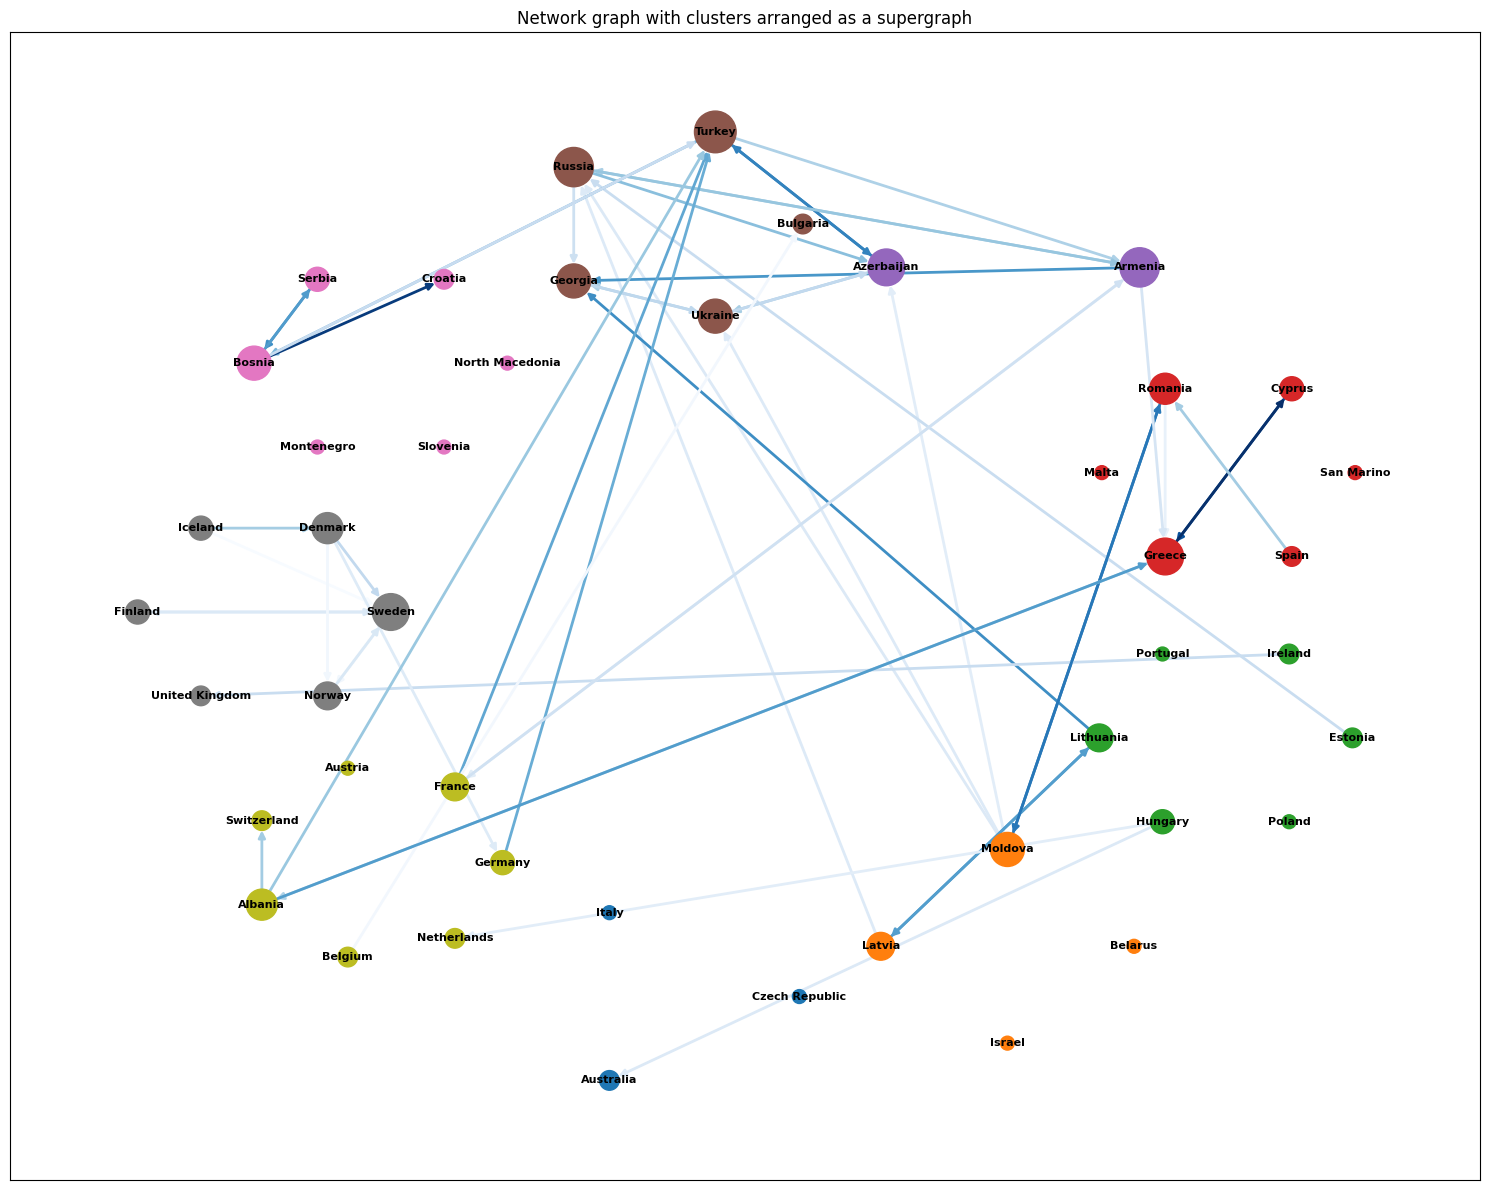

In [61]:
def network_graph_with_supergraph_bias(df, edges_bias,initial_year, final_year, clusters):
    
    # Create a network directed graph
    G = nx.DiGraph()
    
    # Add the nodes with cluster attributes
    for country in clusters.index:
        G.add_node(country, cluster=clusters.loc[country, 'cluster'])
    
    # Get the bias dyads
    bias_d = edges_bias(df, initial_year, final_year)
    
    # Add the edges
    for i, row in bias_d.iterrows():
        if row['bias'] > 0 and row['p_value'] < 0.01 and row['count'] >= 1:
            G.add_edge(row['from_country'], row['to_country'], weight=row['bias'])
    
    # Group nodes by cluster
    communities = [
        list(clusters[clusters['cluster'] == c].index) for c in clusters['cluster'].unique()
    ]
    
    # Create a "supergraph" where each cluster is a node
    supergraph = nx.cycle_graph(len(communities))  # Cycle graph for evenly spaced clusters
    superpos = nx.spring_layout(supergraph, scale=40, seed=429)  # Positions for supernodes
    
    # Generate positions for nodes within each cluster
    pos = {}
    for center, comm in zip(superpos.values(), communities):
        subgraph = G.subgraph(comm)
        subpos = nx.circular_layout(subgraph, center=center, scale=10)  # Increase scale for spacing
        pos.update(subpos)
    
    # Node sizes based on degree
    node_deg = dict(G.degree())  # Get the degree of each node as a dictionary

    # Generate a dictionary of node sizes
    node_sizes = {node: 100 * deg for node, deg in node_deg.items()}  # Scale degree for visibility
    
    # Plot the graph
    plt.figure(figsize=(15, 12))
    
    # Assign distinct colors to each cluster
    colors = plt.cm.tab10.colors  # Use a colormap for up to 10 distinct colors
    for nodes, color in zip(communities, colors[:len(communities)]):
        nx.draw_networkx_nodes(G, pos=pos, nodelist=nodes, node_color=[color] * len(nodes), node_size=[node_sizes[n]+100 for n in nodes])
    
    # Create a colormap for edges based on bias value
    edge_bias = [G[u][v]['weight'] for u, v in G.edges()]
    norm = mcolors.Normalize(vmin=min(edge_bias), vmax=max(edge_bias))  # Normalize bias values
    cmap = plt.cm.Blues  # Choose a colormap (you can change it to another one)
    
    # Draw edges
    nx.draw_networkx_edges(G, pos=pos, node_size=[node_sizes[n]+100 for n in G.nodes], edge_color=edge_bias, edge_cmap=cmap, width=2, edge_vmin=min(edge_bias), edge_vmax=max(edge_bias))
    
    # Draw labels
    nx.draw_networkx_labels(G, pos=pos, font_size=8, font_weight='bold')
    
    # Display the plot
    plt.title("Network graph with clusters arranged as a supergraph")
    plt.tight_layout()
    plt.show()


network_graph_with_supergraph_bias(df_final_round, edges_bias, initial_year=2006, final_year=2023, clusters=cluster)


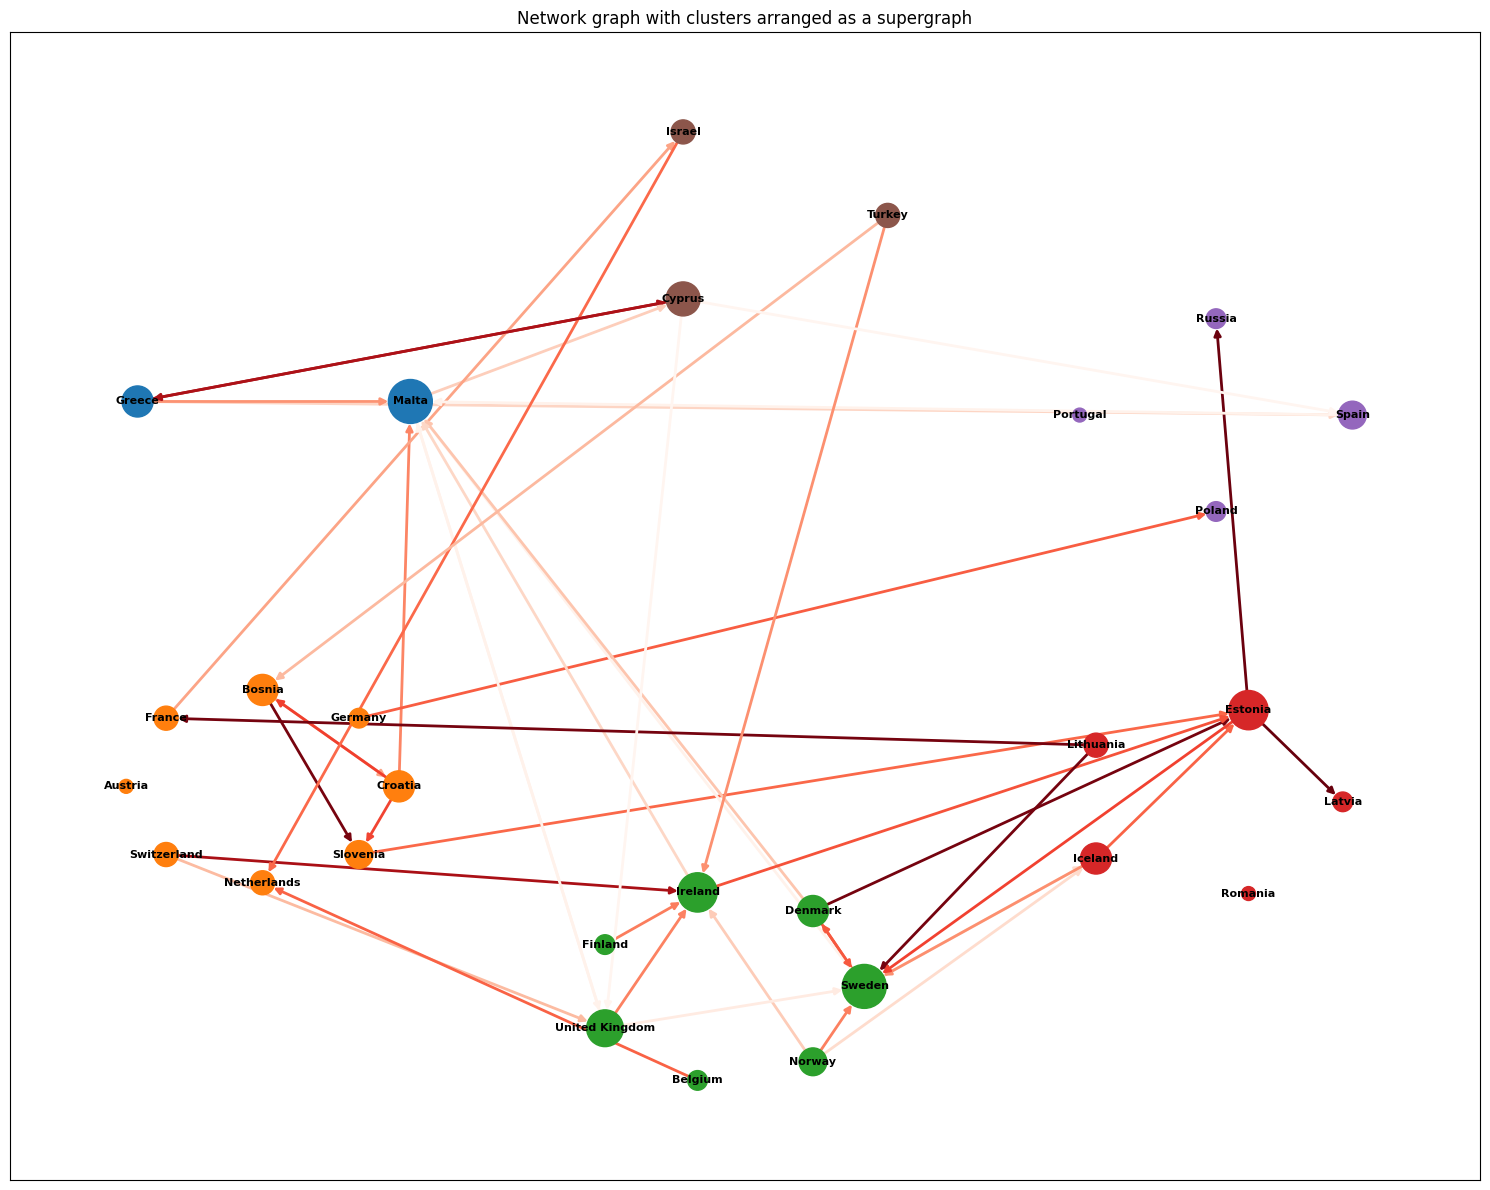

In [79]:
def network_graph_with_supergraph_prob(df, voting_p, initial_year, final_year, clusters):
    
    # Create a network directed graph
    G = nx.DiGraph()
    
    # Add the nodes with cluster attributes
    for country in clusters.index:
        G.add_node(country, cluster=clusters.loc[country, 'cluster'])
    
    # Add the edges based on significant bias
    for i, row in voting_p.iterrows():
        for j in np.arange(0, len(voting_p.columns), 3):
            diff = row[(voting_p.columns[j][0], 'Observed')] - row[(voting_p.columns[j][0], 'Random')]
            if row[(voting_p.columns[j][0], 'p value')] < 0.05 and diff > 0.1:
                G.add_edge(i[0], voting_p.columns[j][0], weight=diff)
    
    # Group nodes by cluster
    communities = [
        list(clusters[clusters['cluster'] == c].index) for c in clusters['cluster'].unique()
    ]
    
    # Create a "supergraph" where each cluster is a node
    supergraph = nx.cycle_graph(len(communities))  # Cycle graph for evenly spaced clusters
    superpos = nx.spring_layout(supergraph, scale=40, seed=429)  # Positions for supernodes
    
    # Generate positions for nodes within each cluster
    pos = {}
    for center, comm in zip(superpos.values(), communities):
        subgraph = G.subgraph(comm)
        subpos = nx.circular_layout(subgraph, center=center, scale=10)  # Increase scale for spacing
        pos.update(subpos)
    
    # Node sizes based on degree
    node_deg = dict(G.degree())  # Get the degree of each node as a dictionary

    # Generate a dictionary of node sizes
    node_sizes = {node: 100 * deg for node, deg in node_deg.items()}  # Scale degree for visibility
    
    # Plot the graph
    plt.figure(figsize=(15, 12))
    
    # Assign distinct colors to each cluster
    colors = plt.cm.tab10.colors  # Use a colormap for up to 10 distinct colors
    for nodes, color in zip(communities, colors[:len(communities)]):
        nx.draw_networkx_nodes(G, pos=pos, nodelist=nodes, node_color=[color] * len(nodes), node_size=[node_sizes[n]+100 for n in nodes])
    
    # Create a colormap for edges based on bias value
    edge_bias = [G[u][v]['weight'] for u, v in G.edges()]
    norm = mcolors.Normalize(vmin=min(edge_bias), vmax=max(edge_bias))  # Normalize bias values
    cmap = plt.cm.Reds  # Choose a colormap (you can change it to another one)
    
    # Draw edges
    nx.draw_networkx_edges(G, pos=pos, node_size=[node_sizes[n]+100 for n in G.nodes], edge_color=edge_bias, edge_cmap=cmap, width=2, edge_vmin=min(edge_bias), edge_vmax=max(edge_bias))
    
    # Draw labels
    nx.draw_networkx_labels(G, pos=pos, font_size=8, font_weight='bold')
    
    # Display the plot
    plt.title("Network graph with clusters arranged as a supergraph")
    plt.tight_layout()
    plt.show()


network_graph_with_supergraph_prob(df_final_round, voting_p, initial_year=2006, final_year=2023, clusters=cluster)

In [68]:
initial_year = 1990
final_year = 2005

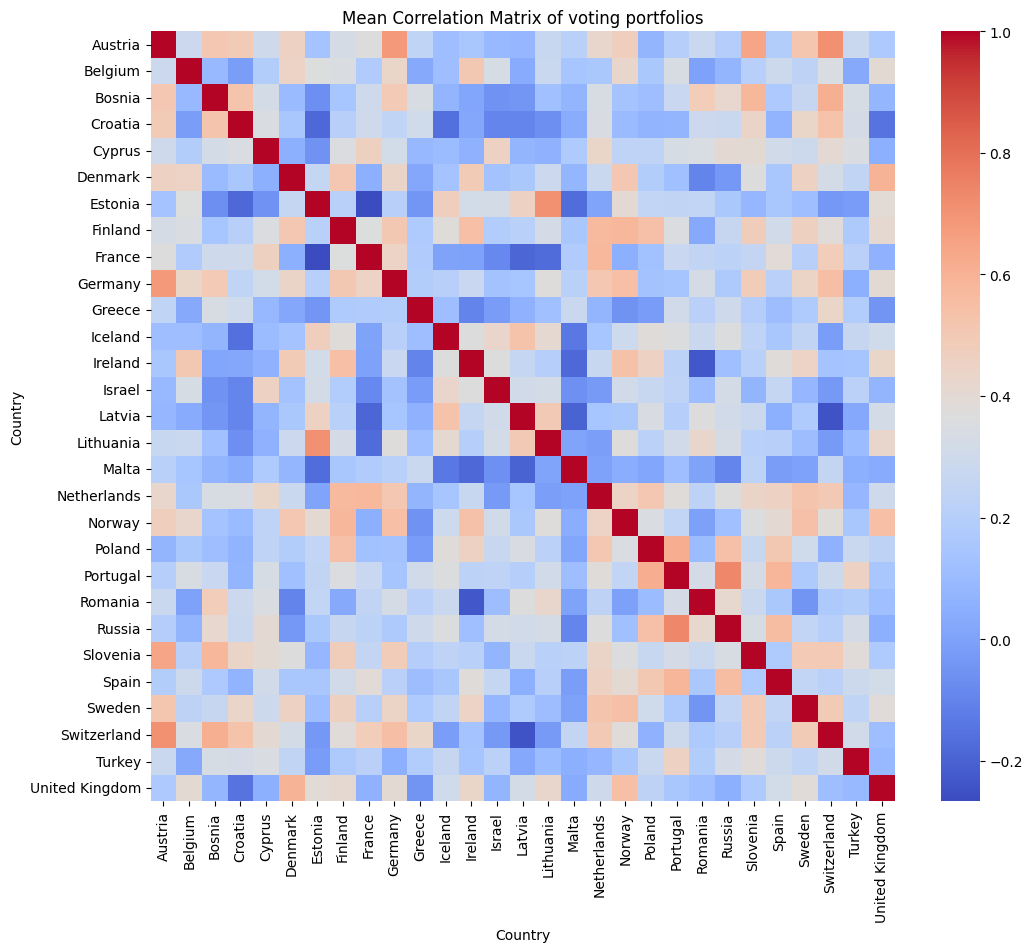

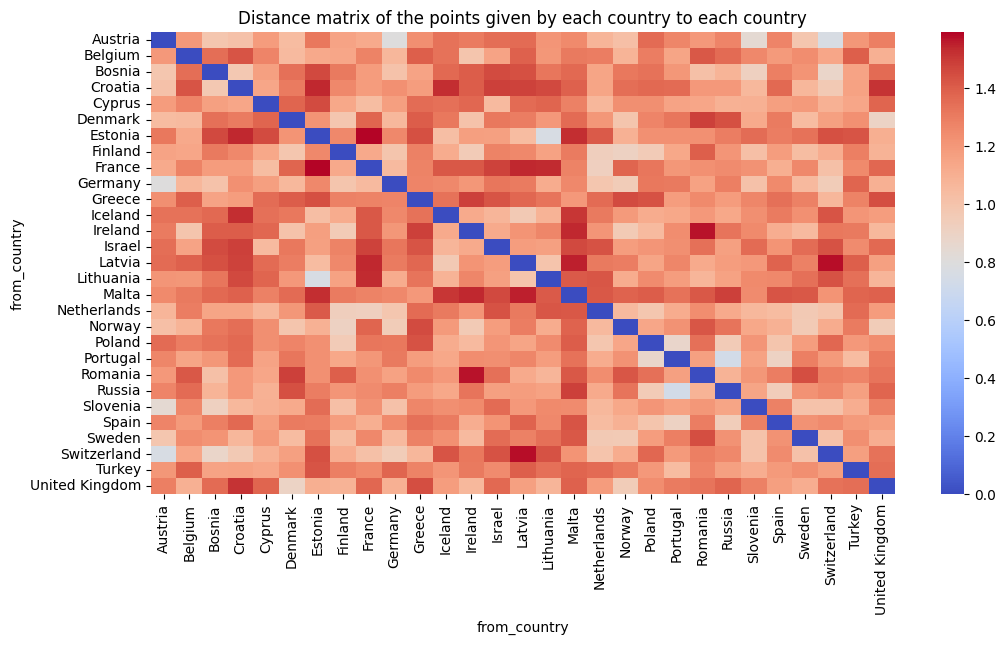

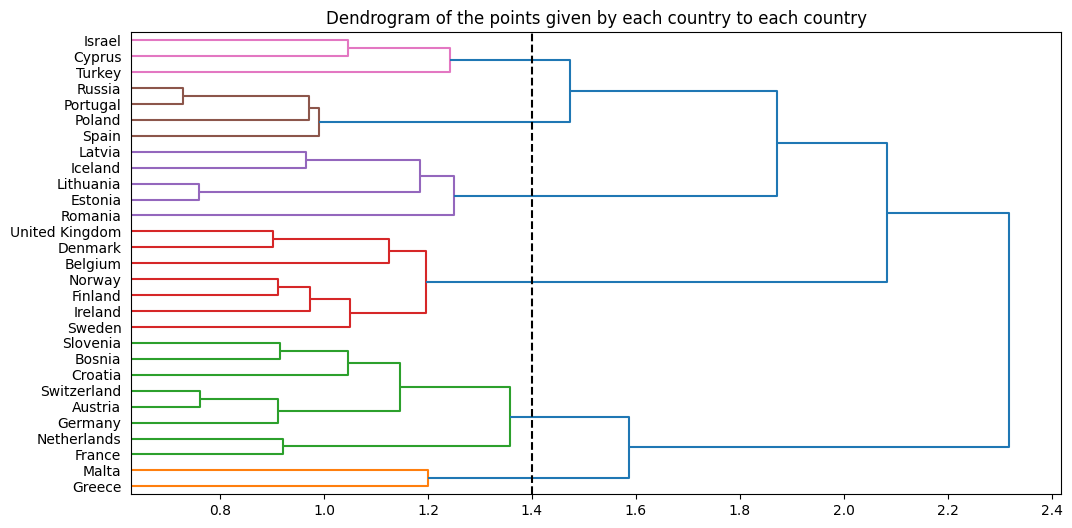

array([[20.        , 22.        ,  0.72869913,  2.        ],
       [ 6.        , 15.        ,  0.76022319,  2.        ],
       [ 0.        , 26.        ,  0.76216146,  2.        ],
       [ 5.        , 28.        ,  0.90086388,  2.        ],
       [ 9.        , 31.        ,  0.9110842 ,  3.        ],
       [ 7.        , 18.        ,  0.91207507,  2.        ],
       [ 2.        , 23.        ,  0.91491103,  2.        ],
       [ 8.        , 17.        ,  0.92139945,  2.        ],
       [11.        , 14.        ,  0.96471845,  2.        ],
       [19.        , 29.        ,  0.97174527,  3.        ],
       [12.        , 34.        ,  0.97307593,  3.        ],
       [24.        , 38.        ,  0.98978793,  4.        ],
       [ 4.        , 13.        ,  1.04551001,  2.        ],
       [ 3.        , 35.        ,  1.04681281,  3.        ],
       [25.        , 39.        ,  1.04974418,  4.        ],
       [ 1.        , 32.        ,  1.12510972,  3.        ],
       [33.        , 42.

In [69]:
threshold = 1.4
Z, corr = hierarchical_clustering(boots_correlation(df_final_round, initial_year, final_year))
plotting_dendrogram(Z, corr, threshold)
Z[Z[:, 2] < threshold]

In [70]:
cluster = get_clusters(Z, corr, cutoff_distance=threshold)
cluster

,cluster
from_country,
Greece,1
Malta,1
Austria,2
Switzerland,2
Bosnia,2
Croatia,2
Slovenia,2
Netherlands,2
France,2


In [72]:
cluster_voting_prob(df_final_round, cluster, initial_year, final_year, cluster_id=3)

To Country       Ireland                       Belgium                      \
Probability       Random  Observed   p-value    Random  Observed   p-value   
from_country                                                                 
Ireland              NaN       NaN       NaN  0.443042  0.363636  0.795867   
Belgium         0.443042  0.636364  0.161845       NaN       NaN       NaN   
Finland         0.443282  0.875000  0.016470  0.445546  0.125000  0.991069   
Denmark         0.448742  0.777778  0.048981  0.450281  0.125000  0.991661   
Norway          0.440096  0.785714  0.009362  0.443042  0.272727  0.928728   
Sweden          0.440096  0.642857  0.104404  0.442354  0.333333  0.853630   
United Kingdom  0.440096  0.857143  0.001698  0.442354  0.416667  0.676393   

To Country       Finland                       Denmark  ...            \
Probability       Random  Observed   p-value    Random  ...   p-value   
from_country                                            ...             
Ireland         0.443282  0.125000  0.990773  0.448742  ...  0.375608   
Belgium         0.445546  0.000000  1.000000  0.450281  ...  0.780351   
Finland              NaN       NaN       NaN  0.448860  ...  0.971973   
Denmark         0.448860  0.166667  0.971973       NaN  ...       NaN   
Norway          0.443282  0.250000  0.931994  0.447346  ...  0.026329   
Sweden          0.442337  0.333333  0.839404  0.446204  ...  0.002045   
United Kingdom  0.442337  0.000000  1.000000  0.446204  ...  0.357143   

To Country        Norway                        Sweden                      \
Probability       Random  Observed   p-value    Random  Observed   p-value   
from_country                                                                 
Ireland         0.440096  0.642857  0.104404  0.440096  0.642857  0.104404   
Belgium         0.443042  0.545455  0.349096  0.442354  0.666667  0.101712   
Finland         0.443282  0.500000  0.507330  0.442337  0.666667  0.154223   
Denmark         0.447346  0.700000  0.098947  0.446204  0.909091  0.002045   
Norway               NaN       NaN       NaN  0.439742  0.866667  0.000847   
Sweden          0.439742  0.600000  0.161014       NaN       NaN       NaN   
United Kingdom  0.439742  0.533333  0.316914  0.439432  0.750000  0.011983   

To Country     United Kingdom                      
Probability            Random  Observed   p-value  
from_country                                       
Ireland              0.440096  0.714286  0.036176  
Belgium              0.442354  0.666667  0.101712  
Finland              0.442337  0.444444  0.620744  
Denmark              0.446204  0.727273  0.057907  
Norway               0.439742  0.266667  0.949966  
Sweden               0.439432  0.500000  0.403274  
United Kingdom            NaN       NaN       NaN  

[7 rows x 21 columns]

In [74]:
voting_p = voting_prob(df_final_round, initial_year, final_year)
voting_p

To Country        France                       Ireland                      \
Probability       Random  Observed   p value    Random  Observed   p value   
France               NaN       NaN       NaN  0.481161  0.500000  0.548609   
Ireland         0.481161  0.642857  0.172913       NaN       NaN       NaN   
Iceland         0.481543  0.538462  0.446021  0.481543  0.538462  0.446021   
Spain           0.486190  0.375000  0.873271  0.481161  0.500000  0.548609   
United Kingdom  0.486190  0.375000  0.873271  0.481161  0.857143  0.004346   
Denmark         0.493557  0.545455  0.482563  0.487372  0.777778  0.078030   
Germany         0.486856  0.466667  0.659338  0.481543  0.615385  0.245924   
Austria         0.481543  0.384615  0.835418  0.483793  0.666667  0.164042   
Switzerland     0.495525  0.545455  0.487887  0.489777  1.000000  0.001622   
Belgium         0.485597  0.500000  0.573297  0.488420  0.636364  0.248909   
Cyprus          0.488299  0.533333  0.463282  0.483208  0.538462  0.450867   
Netherlands     0.475376  0.500000  0.544771  0.475376  0.583333  0.322448   
Sweden          0.486190  0.500000  0.554276  0.481161  0.642857  0.172913   
Turkey          0.488299  0.466667  0.663489  0.483208  0.846154  0.008153   
Israel          0.488953  0.666667  0.173198  0.482466  0.300000  0.931862   
Greece          0.490710  0.428571  0.767028  0.485597  0.416667  0.777109   
Portugal        0.479616  0.666667  0.156858  0.479616  0.750000  0.055222   
Norway          0.488299  0.666667  0.130432  0.481161  0.785714  0.020616   
Finland         0.489777  0.666667  0.234196  0.494181  0.875000  0.032683   
Malta           0.481565  0.066667  0.999947  0.475438  0.615385  0.232000   
Croatia         0.472431  0.230769  0.981559  0.463530  0.545455  0.402144   
Bosnia          0.473716  0.454545  0.663356  0.463121  0.555556  0.409899   
Slovenia        0.457552  0.555556  0.396535  0.457927  0.750000  0.096112   
Poland          0.465526  0.555556  0.415698  0.465526  0.444444  0.673792   
Russia          0.475571  0.555556  0.440072  0.462479  0.428571  0.707403   
Romania         0.481578  0.285714  0.924492  0.465653  0.600000  0.435801   
Estonia         0.455147  0.555556  0.390795  0.455222  0.625000  0.270445   
Lithuania       0.454545  1.000000  0.042688  0.454545  0.666667  0.432006   
Latvia          0.473708  0.400000  0.777909  0.441919  0.666667  0.413271   

To Country       Iceland                         Spain  ...   Romania  \
Probability       Random  Observed   p value    Random  ...   p value   
France          0.481543  0.230769  0.984285  0.486190  ...  0.742115   
Ireland         0.481543  0.538462  0.446021  0.481161  ...  1.000000   
Iceland              NaN       NaN       NaN  0.481543  ...  1.000000   
Spain           0.481543  0.384615  0.835418       NaN  ...  0.459756   
United Kingdom  0.481543  0.461538  0.661456  0.486190  ...  1.000000   
Denmark         0.487372  0.777778  0.078030  0.493557  ...  0.874330   
Germany         0.481989  0.333333  0.907970  0.486856  ...  0.924492   
Austria         0.483793  0.666667  0.164042  0.481543  ...  0.954644   
Switzerland     0.491475  0.500000  0.617917  0.495525  ...  1.000000   
Belgium         0.489643  0.400000  0.810605  0.485597  ...  1.000000   
Cyprus          0.483793  0.250000  0.974862  0.488299  ...  0.459756   
Netherlands     0.475302  0.363636  0.851666  0.475376  ...  1.000000   
Sweden          0.481543  0.769231  0.034613  0.486190  ...  0.924492   
Turkey          0.483793  0.250000  0.974862  0.488299  ...  0.629807   
Israel          0.483163  0.555556  0.458627  0.488953  ...  0.161251   
Greece          0.486452  0.363636  0.868296  0.490710  ...  0.318032   
Portugal        0.479927  0.454545  0.678566  0.479616  ...  1.000000   
Norway          0.481543  0.769231  0.034613  0.488299  ...  0.877027   
Finland         0.496751  0.285714  0.935340  0.489777  ...  1.000000   
Malta           0.475376  0.166667  0.994839  0.

In [75]:
cluster = get_clusters(Z, corr, cutoff_distance=threshold)

results, p_values = bias_among_cluster(cluster, df_final_round, initial_year, final_year)
results

c:\Users\mate1\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\mate1\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005
1,NaN,0.117647,-1.305556,2.547619,2.595238,1.400000,2.400000,4.642857,-0.950000,NaN,NaN,0.357143,-1.309524,-0.630435,2.222222,0.888889
2,-0.432353,0.352941,-0.833333,-0.232143,-0.142857,0.025000,0.035714,-0.315476,0.550000,0.823129,0.990476,0.736508,0.860544,0.183230,0.681481,0.355556
3,-0.131653,0.240896,0.420635,-0.119048,-0.461905,0.400000,0.575000,2.073810,0.450000,0.319048,0.551020,1.059524,0.945238,1.004348,1.270370,2.962963
4,NaN,NaN,NaN,NaN,-0.345238,NaN,6.400000,0.000000,-0.750000,-0.119048,1.226190,1.666667,0.309524,-0.938406,-0.537037,-4.333333
5,-0.058824,4.176471,-1.305556,3.404762,-0.059524,-0.579167,-2.300000,0.071429,-0.133333,-0.476190,-0.452381,-0.523810,-3.238095,-0.282609,-1.333333,-0.870370
6,-0.362745,0.843137,-0.740741,-0.492063,NaN,-0.233333,-2.975000,-4.809524,-0.916667,0.325397,-1.015873,1.928571,-2.269841,-0.188406,-3.203704,-2.055556


c:\Users\mate1\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\Users\mate1\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\Users\mate1\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\mate1\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\mate1\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in

KeyError: 'North Macedonia'

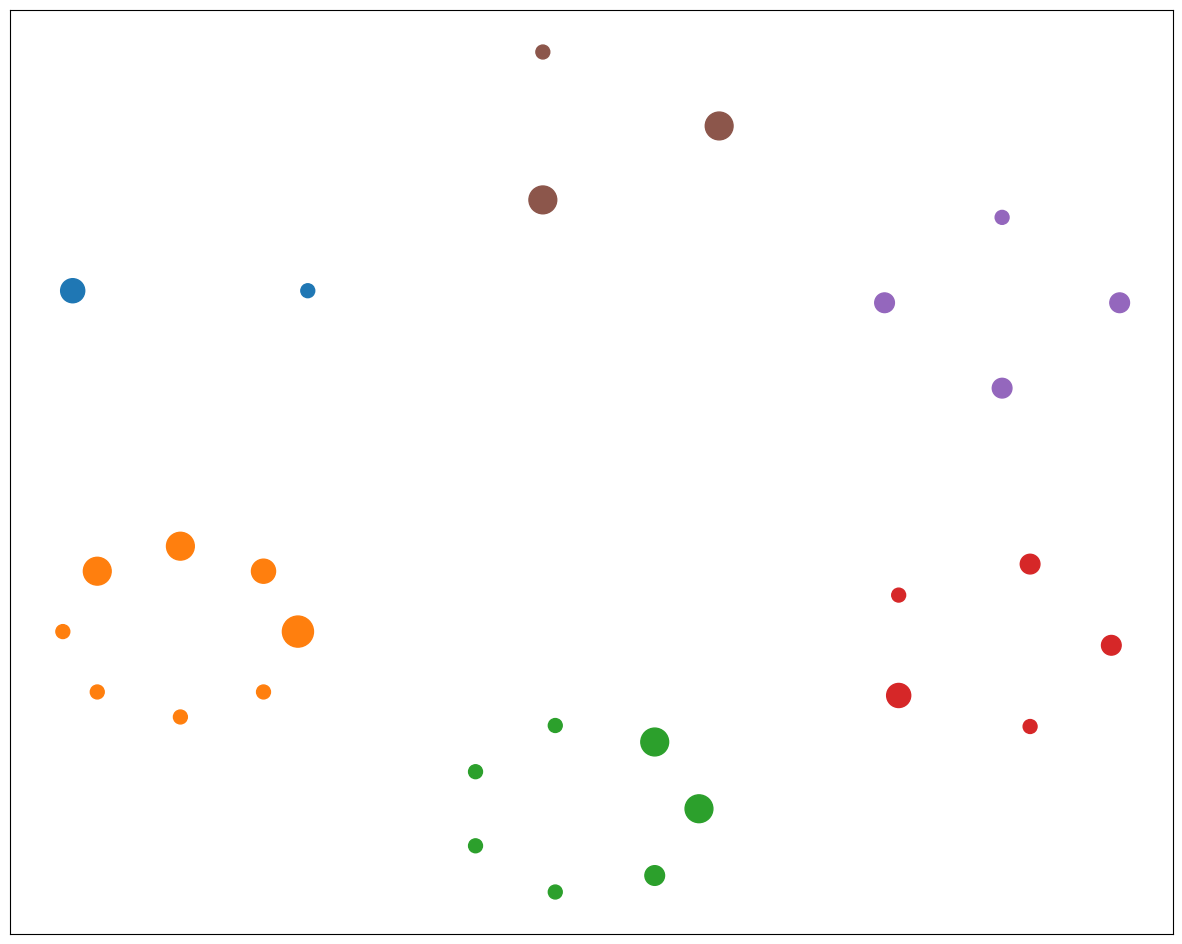

In [77]:
network_graph_with_supergraph_bias(df_final_round, edges_bias, initial_year, final_year, clusters=cluster)

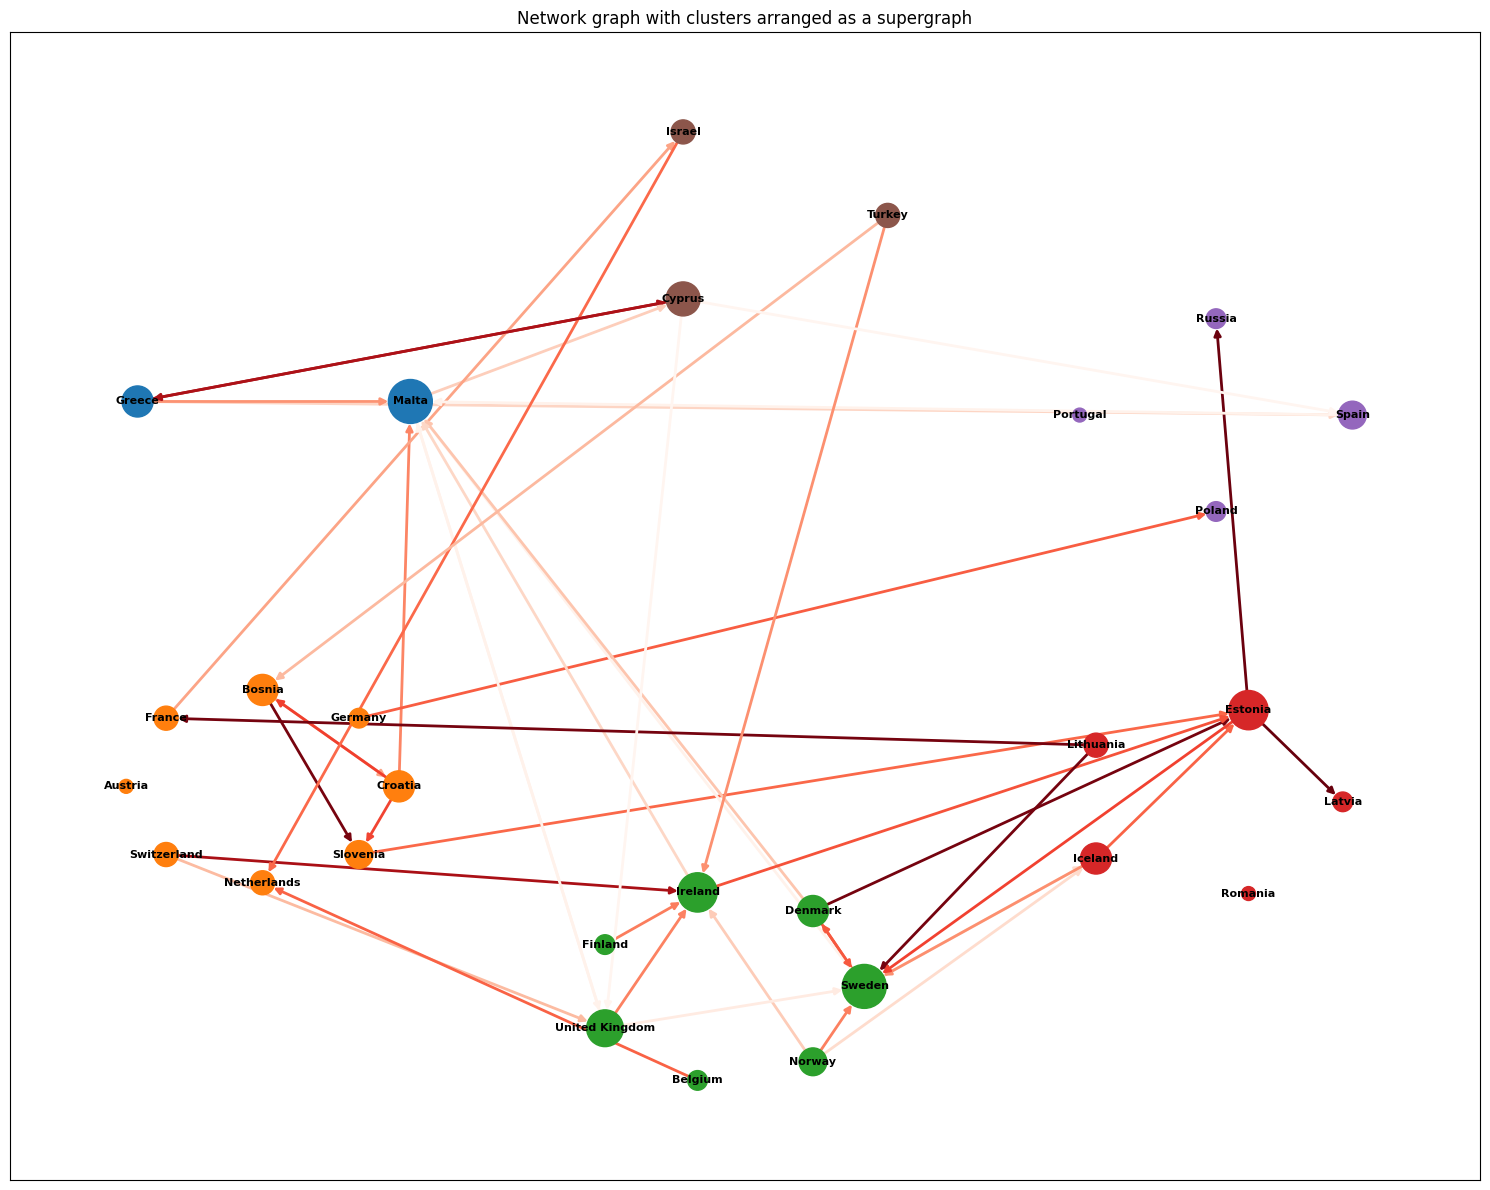

In [80]:
network_graph_with_supergraph_prob(df_final_round, voting_p, initial_year, final_year, clusters=cluster)